## Technical analysis Forex data feature engineering

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(""), os.pardir)))

In [2]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ta.volatility import (
    AverageTrueRange,
    BollingerBands
)
from ta.trend import (
    MACD,
    ADXIndicator,
    AroonIndicator,
    PSARIndicator,
    VortexIndicator
)
from ta.momentum import (
    RSIIndicator,
    StochRSIIndicator,
    UltimateOscillator
)
from rl_trading.data import (
    FOREX_PAIRS,
    ForexDataSource,
    ForexFeEngStrategy,
    load_processed_forex_data,
    engineer_forex_features
)
from config import (
    DATA_PATH
)

In [3]:
forex_data = load_processed_forex_data(DATA_PATH, ForexDataSource.FOREXTESTER, pairs=FOREX_PAIRS, version='Agg')

In [4]:
target_prices = forex_data['EURUSD'].copy()
target_prices['<VOLUME>'] = np.NaN

In [5]:
ta.add_volatility_ta(target_prices, high='<HIGH>', low="<LOW>", close='<CLOSE>', fillna=True)
ta.add_trend_ta(target_prices, high='<HIGH>', low="<LOW>", close='<CLOSE>', fillna=True)
ta.add_momentum_ta(target_prices, high='<HIGH>', low="<LOW>", close='<CLOSE>', volume='<VOLUME>', fillna=True)

/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:730: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._trs[0] = diff_directional_movement.dropna()[
/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:748: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._dip[0] = pos.dropna()[0: self._window].sum()
/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:760: FutureWarning: The behavior of `series[i:j]` with 

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOLUME>,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
0,2001-01-02 23:00:00,0.9507,0.9507,0.9505,0.9507,NaN,0.950700,0.950700,0.950700,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.950700
1,2001-01-02 23:15:00,0.9507,0.9507,0.9506,0.9507,NaN,0.950700,0.950700,0.950700,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.950700
2,2001-01-02 23:30:00,0.9507,0.9509,0.9507,0.9508,NaN,0.950733,0.950828,0.950639,0.019837,...,-25.003725,0.000000,0.000000,0.000839,0.000168,0.000671,0.0,0.0,0.0,0.950743
3,2001-01-02 23:45:00,0.9508,0.9508,0.9506,0.9506,NaN,0.950700,0.950841,0.950559,0.029747,...,-74.996275,0.000000,0.000000,-0.000191,0.000096,-0.000287,0.0,0.0,0.0,0.950682
4,2001-01-03 00:00:00,0.9506,0.9507,0.9505,0.9506,NaN,0.950680,0.950830,0.950530,0.031481,...,-74.996275,0.000000,0.000000,-0.000996,-0.000122,-0.000873,0.0,0.0,0.0,0.950646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762315,2022-09-30 17:45:00,0.9801,0.9802,0.9795,0.9798,NaN,0.979320,0.981232,0.977408,0.390403,...,-41.026425,0.002119,0.112394,0.053723,0.046333,0.007390,0.0,0.0,0.0,0.978809
762316,2022-09-30 18:00:00,0.9798,0.9808,0.9796,0.9807,NaN,0.979335,0.981285,0.977385,0.398155,...,-18.420805,0.001851,0.142959,0.058489,0.048764,0.009725,0.0,0.0,0.0,0.978906
762317,2022-09-30 18:15:00,0.9807,0.9807,0.9805,0.9805,NaN,0.979365,0.981366,0.977364,0.408687,...,-28.125990,0.001733,0.194151,0.059926,0.050996,0.008930,0.0,0.0,0.0,0.978947
762318,2022-09-30 18:30:00,0.9805,0.9807,0.9799,0.9800,NaN,0.979415,0.981427,0.977403,0.410905,...,-43.749884,0.001741,0.071479,0.056299,0.052057,0.004242,0.0,0.0,0.0,0.978954


In [6]:
target_prices.drop('momentum_pvo', axis=1 ,inplace=True)
target_prices.drop('momentum_pvo_signal', axis=1, inplace=True)
target_prices.drop('momentum_pvo_hist', axis=1, inplace=True)
target_prices.drop('<VOLUME>', axis=1 ,inplace=True)

In [7]:
target_prices.isna().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
762315    False
762316    False
762317    False
762318    False
762319    False
Length: 762320, dtype: bool

### Volatility Indicators

#### Bollinger Bands

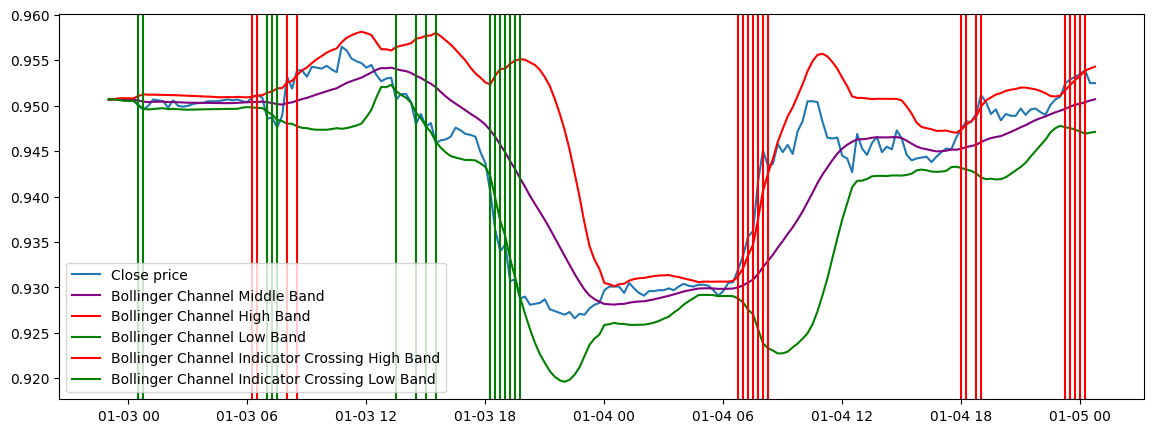

In [8]:
length = 200

plt.figure(figsize=(14,5))

plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_bbm'][:length], label='Bollinger Channel Middle Band', color='purple')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_bbh'][:length], label='Bollinger Channel High Band', color='red')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_bbl'][:length], label='Bollinger Channel Low Band', color='green')

volatility_bbhi = target_prices['volatility_bbhi'][:length]
for i, x in enumerate(volatility_bbhi[volatility_bbhi == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('Bollinger Channel Indicator Crossing High Band' if i==0 else None), color='red')
    
volatility_bbli = target_prices['volatility_bbli'][:length]
for i, x in enumerate(volatility_bbli[volatility_bbli == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('Bollinger Channel Indicator Crossing Low Band' if i==0 else None), color='green')    

plt.legend()
plt.show()

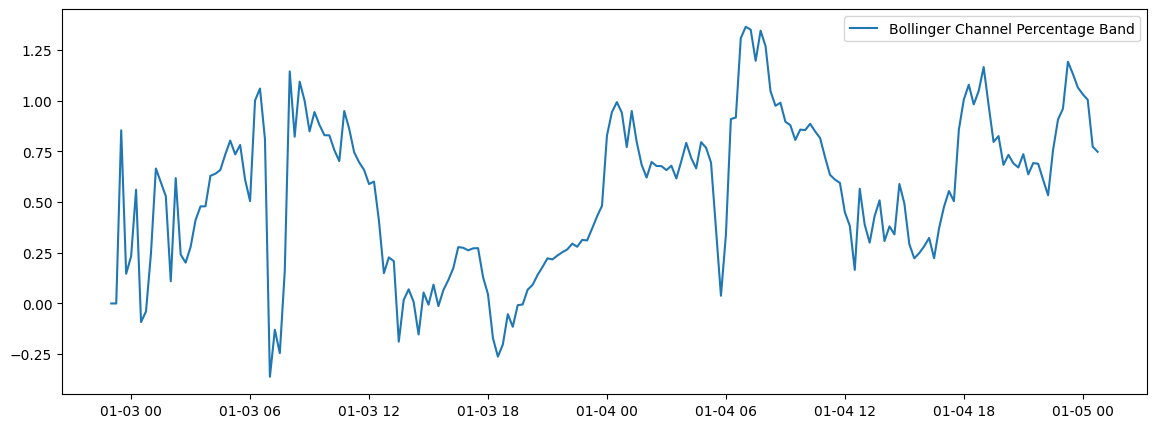

In [9]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_bbp'][:length], label='Bollinger Channel Percentage Band')
plt.legend()
plt.show()

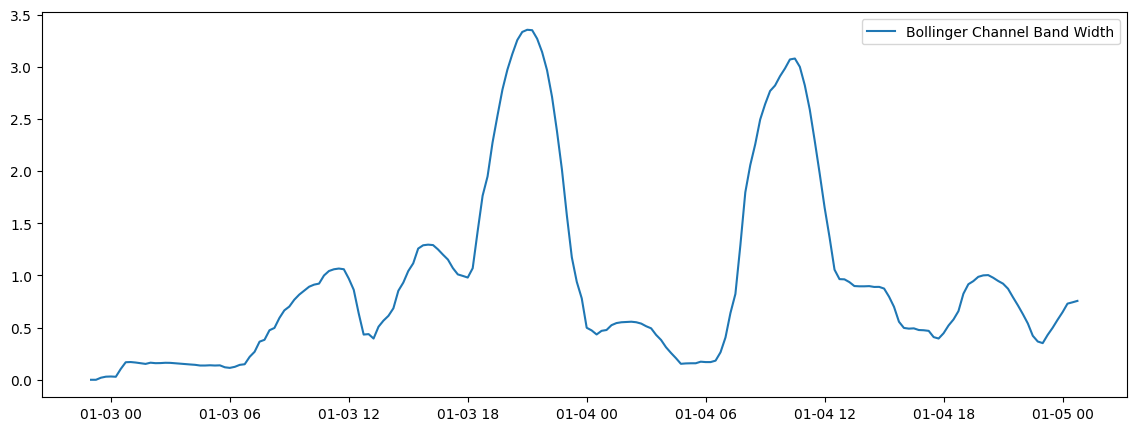

In [10]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_bbw'][:length], label='Bollinger Channel Band Width')
plt.legend()
plt.show()

#### Keltner Channel 

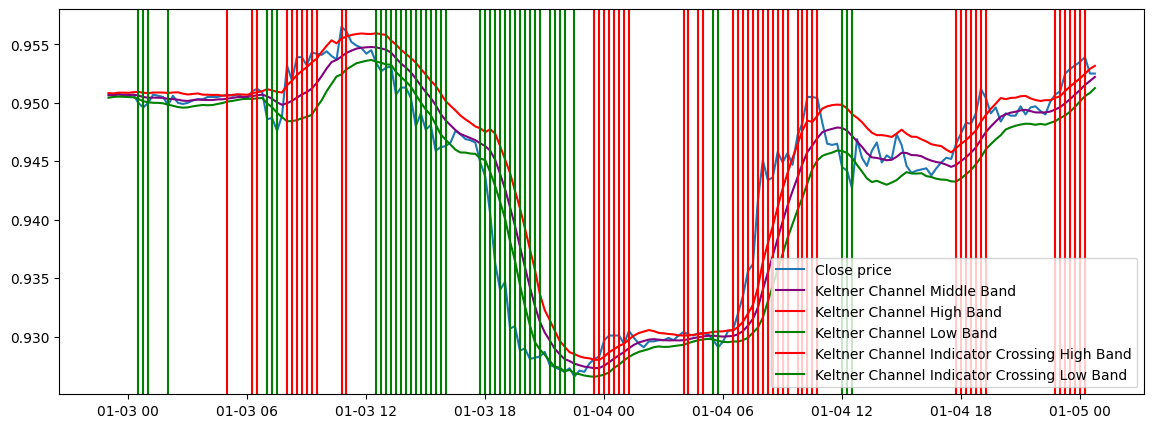

In [11]:
length = 200

plt.figure(figsize=(14,5))

plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_kcc'][:length], label='Keltner Channel Middle Band', color='purple')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_kch'][:length], label='Keltner Channel High Band', color='red')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_kcl'][:length], label='Keltner Channel Low Band', color='green')

volatility_bbhi = target_prices['volatility_kchi'][:length]
for i, x in enumerate(volatility_bbhi[volatility_bbhi == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('Keltner Channel Indicator Crossing High Band' if i==0 else None), color='red')
    
volatility_bbli = target_prices['volatility_kcli'][:length]
for i, x in enumerate(volatility_bbli[volatility_bbli == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('Keltner Channel Indicator Crossing Low Band' if i==0 else None), color='green')    

plt.legend()
plt.show()

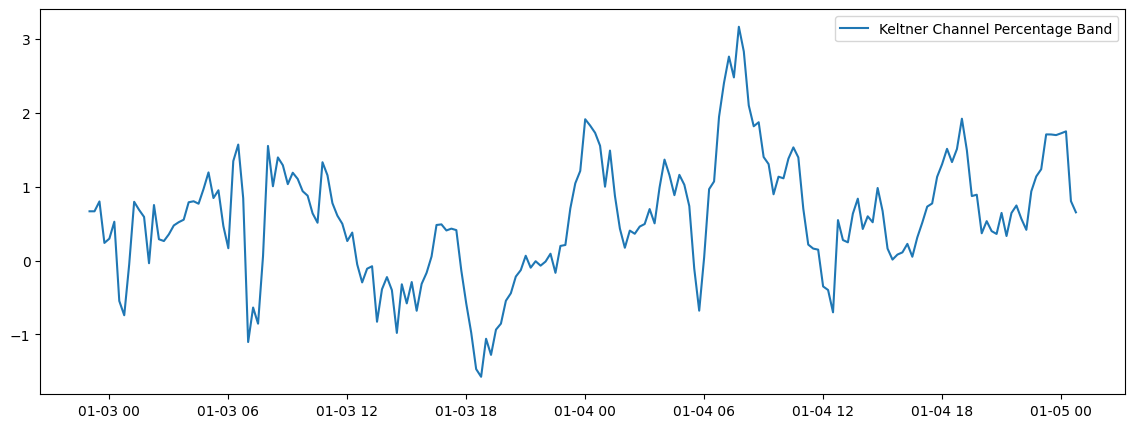

In [12]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_kcp'][:length], label='Keltner Channel Percentage Band')
plt.legend()
plt.show()

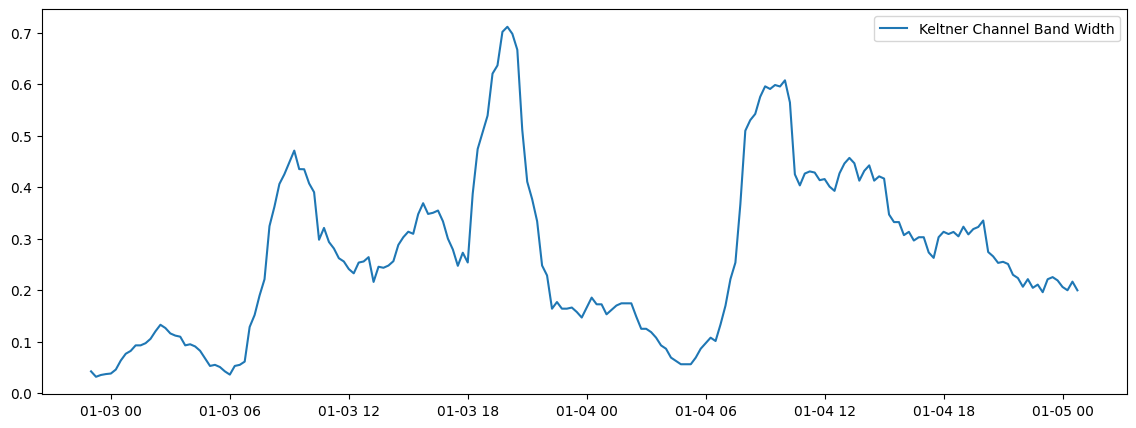

In [13]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_kcw'][:length], label='Keltner Channel Band Width')
plt.legend()
plt.show()

#### Donchian Channel

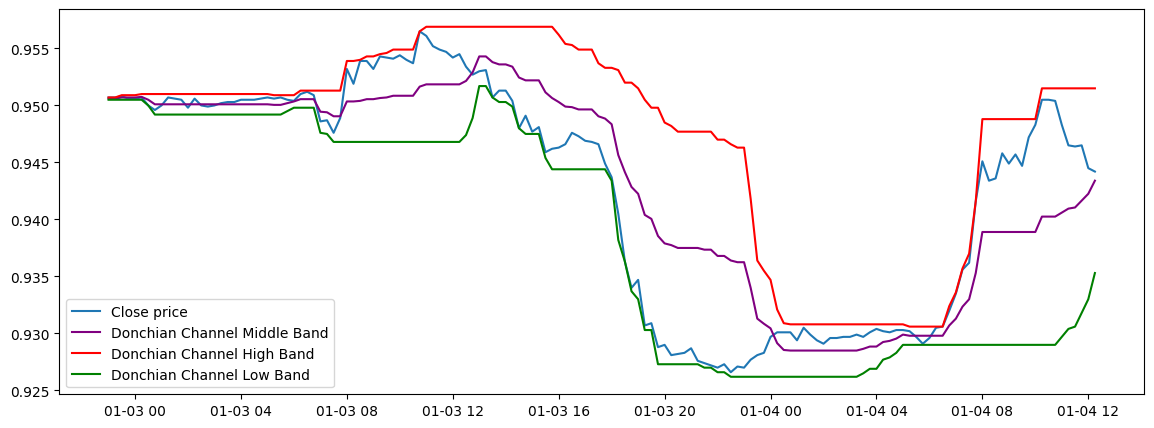

In [14]:
length = 150

plt.figure(figsize=(14,5))

plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_dcm'][:length], label='Donchian Channel Middle Band', color='purple')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_dch'][:length], label='Donchian Channel High Band', color='red')
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_dcl'][:length], label='Donchian Channel Low Band', color='green')

plt.legend()
plt.show()

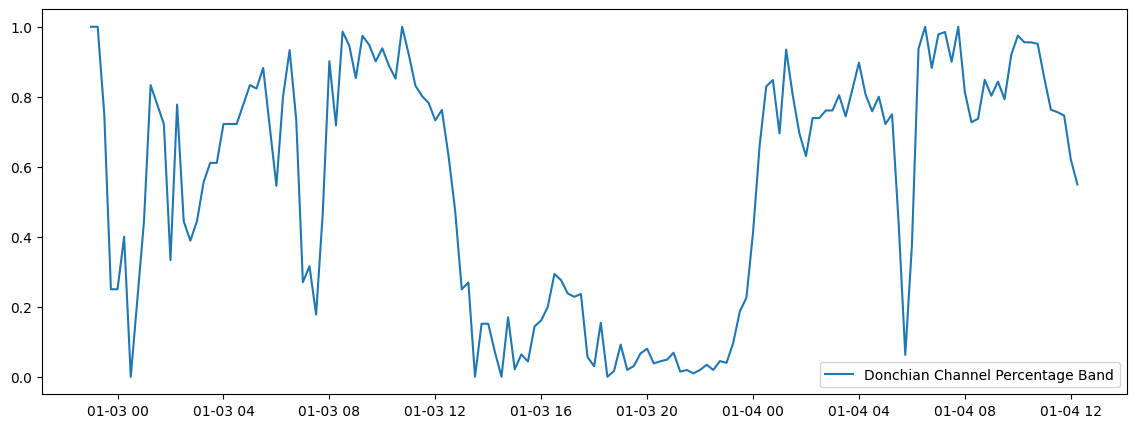

In [15]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_dcp'][:length], label='Donchian Channel Percentage Band')
plt.legend()
plt.show()

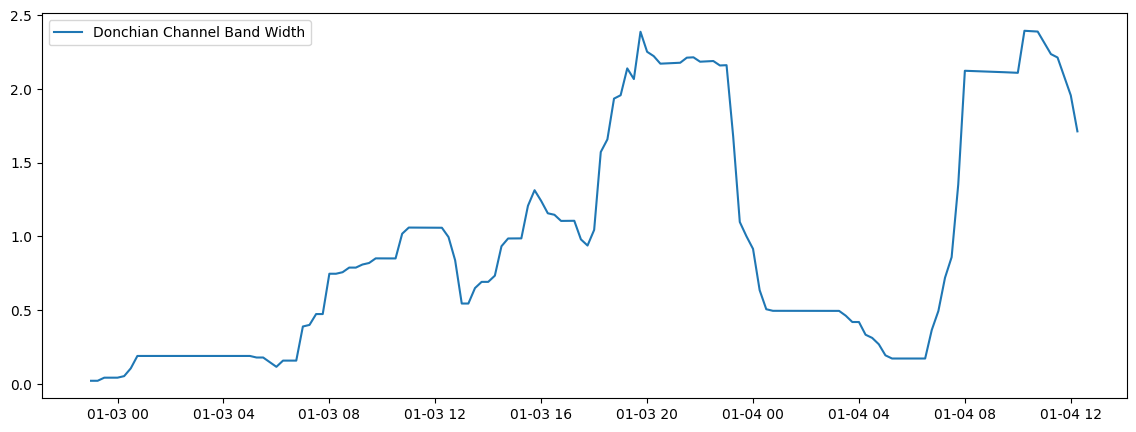

In [16]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_dcw'][:length], label='Donchian Channel Band Width')
plt.legend()
plt.show()

#### Average True Range

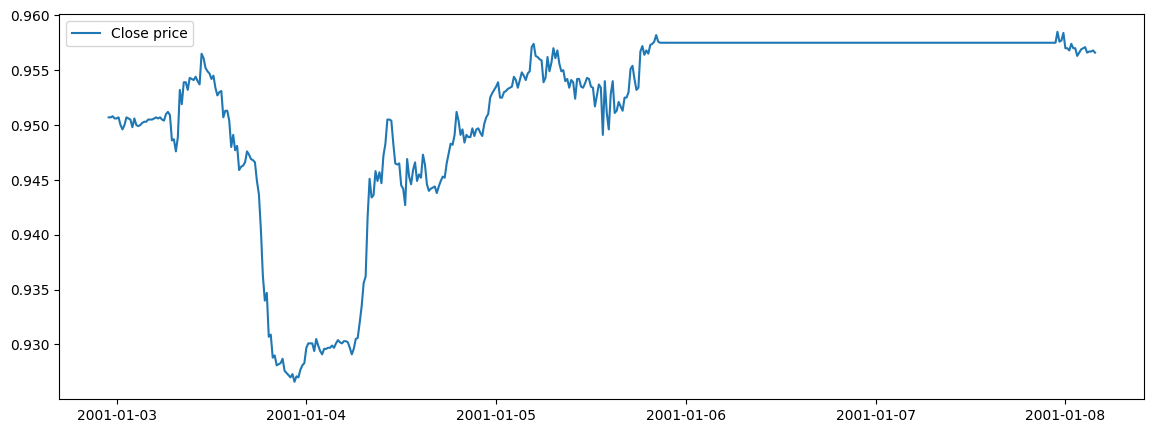

In [17]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

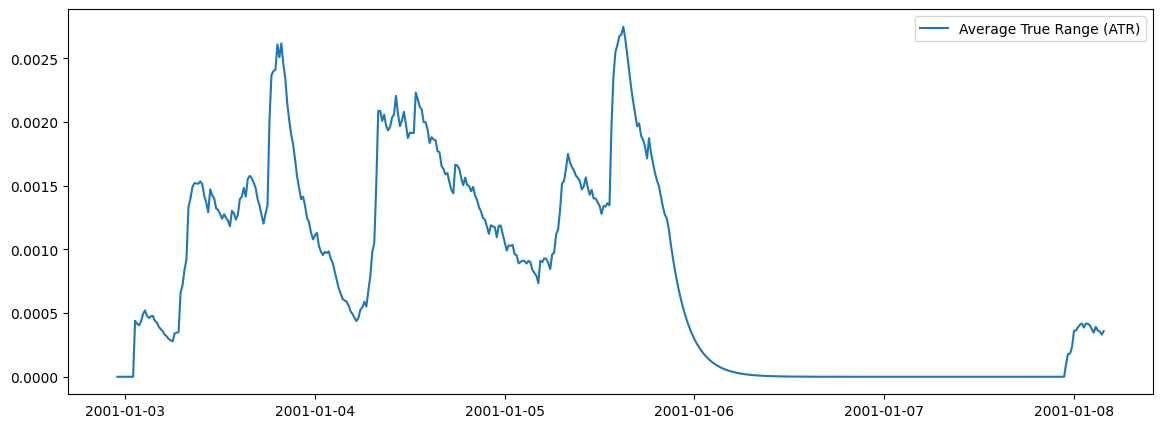

In [18]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_atr'][:length], label='Average True Range (ATR)')
plt.legend()
plt.show()

#### Ulcer Index (UI)

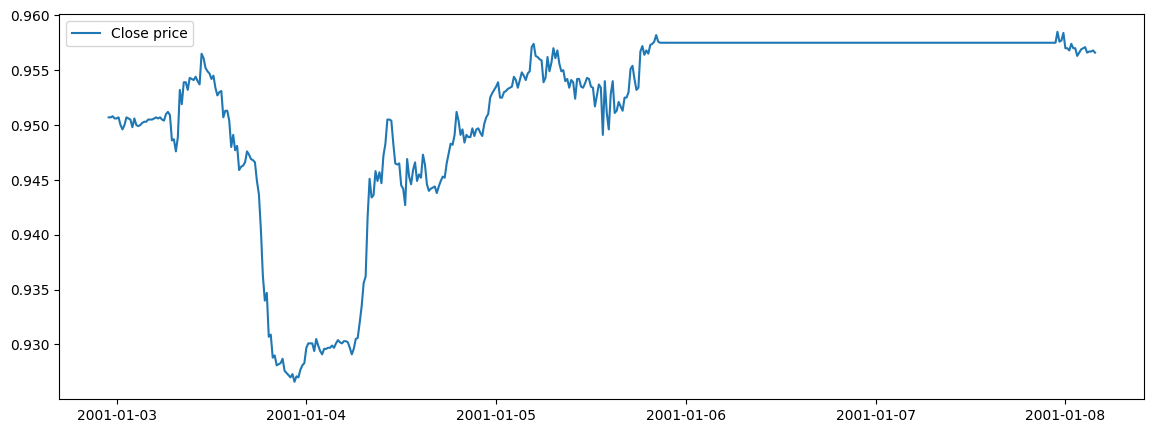

In [19]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

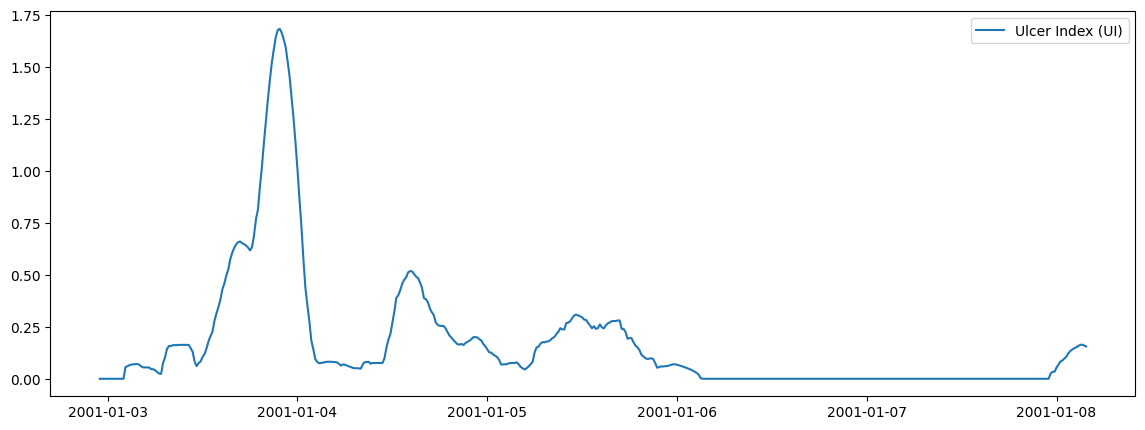

In [20]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['volatility_ui'][:length], label='Ulcer Index (UI)')
plt.legend()
plt.show()

### Trend Indicators

#### Moving Average Convergence Divergence (MACD)

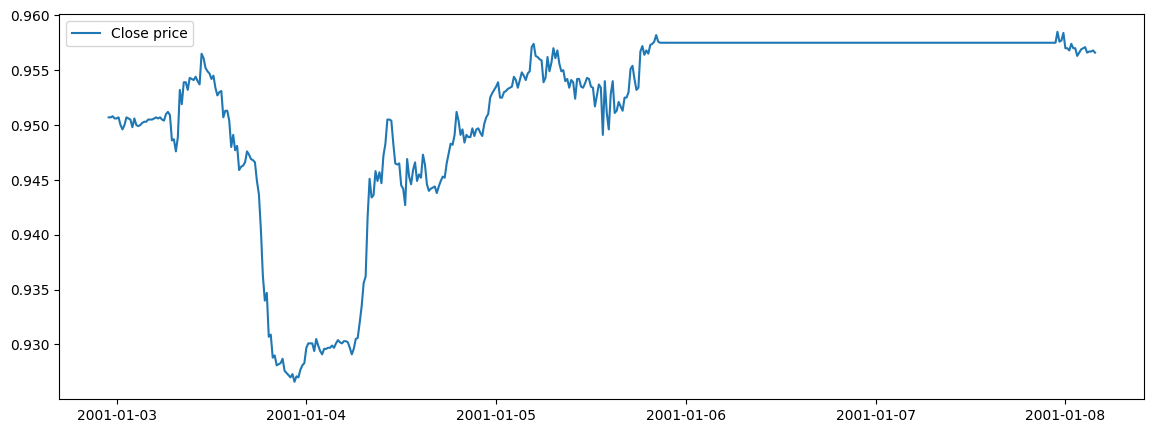

In [21]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

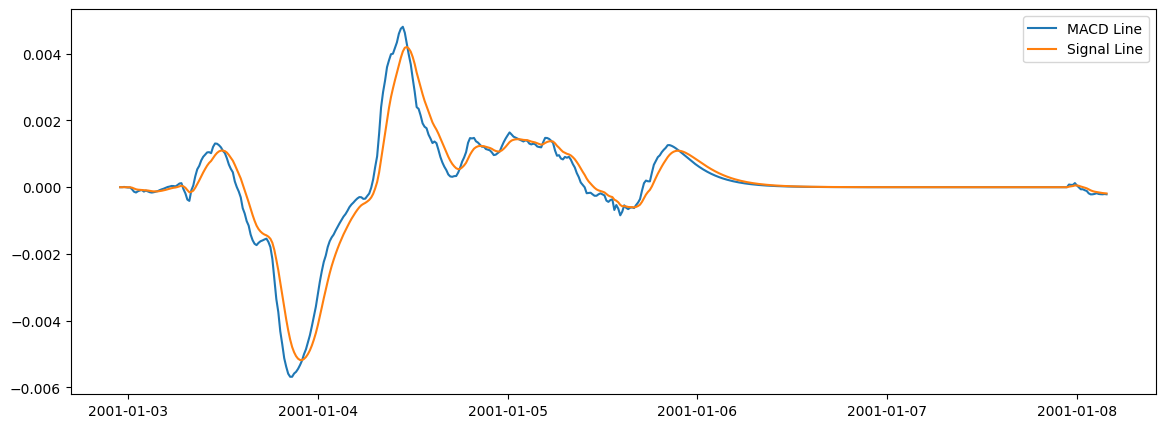

In [22]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_macd'][:length], label='MACD Line')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_macd_signal'][:length], label='Signal Line')
plt.legend()
plt.show()

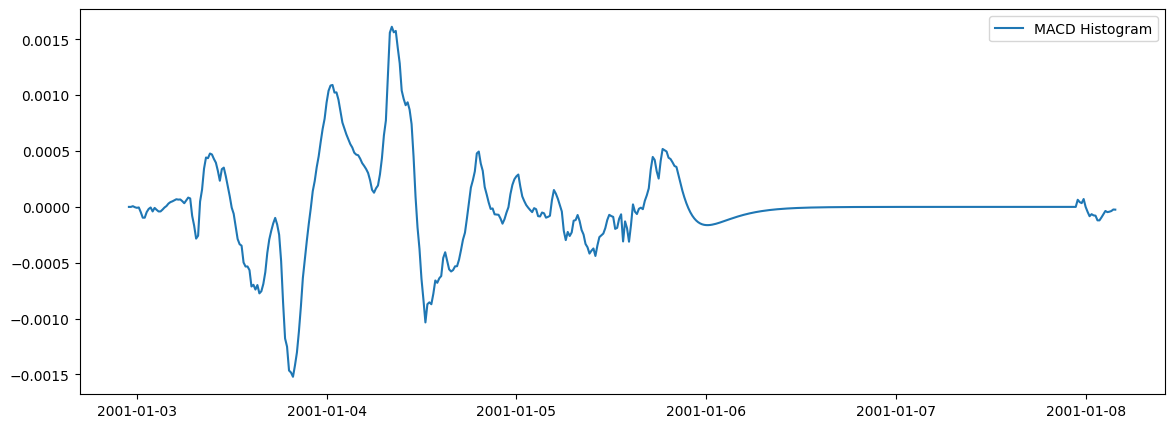

In [23]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_macd_diff'][:length], label='MACD Histogram')
plt.legend()
plt.show()

#### EMA - Exponential Moving Average, SMA - Simple Moving Average

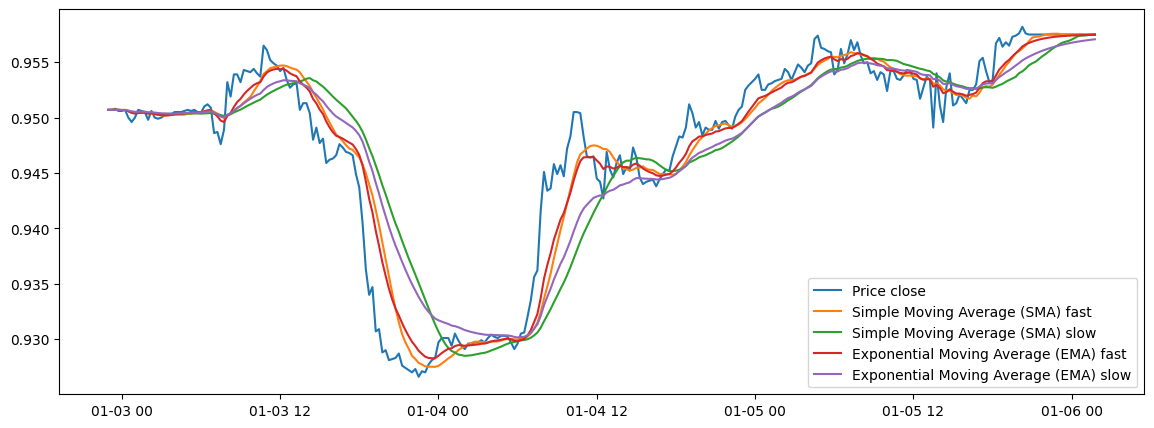

In [24]:
length = 300
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Price close')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_sma_fast'][:length], label='Simple Moving Average (SMA) fast')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_sma_slow'][:length], label='Simple Moving Average (SMA) slow')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ema_fast'][:length], label='Exponential Moving Average (EMA) fast')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ema_slow'][:length], label='Exponential Moving Average (EMA) slow')
plt.legend()
plt.show()

#### Vortex Indicator (VI) 

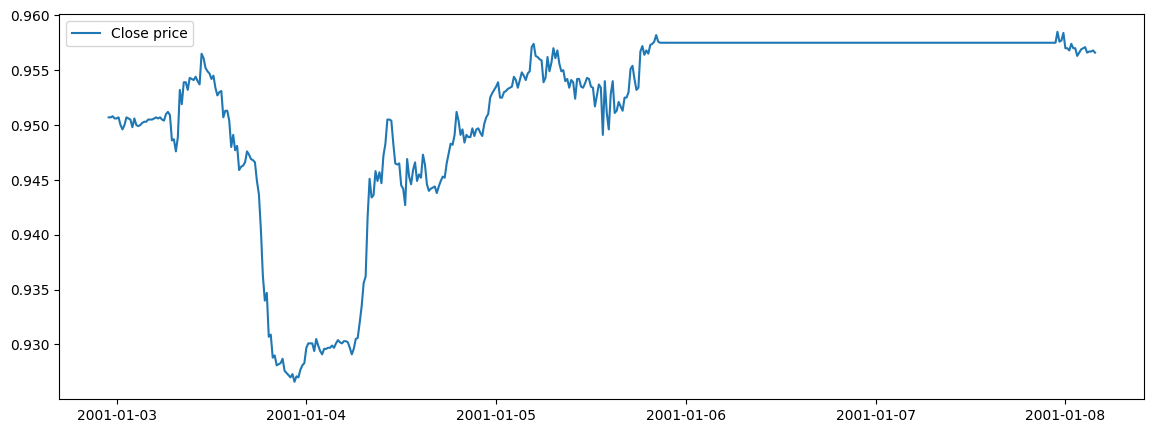

In [25]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

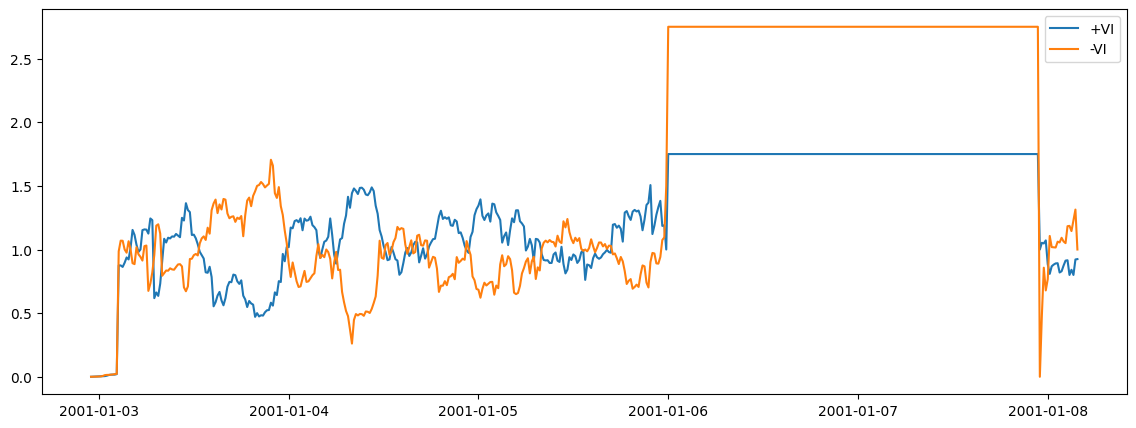

In [26]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_vortex_ind_pos'][:length], label='+VI')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_vortex_ind_neg'][:length], label='-VI')
plt.legend()
plt.show()

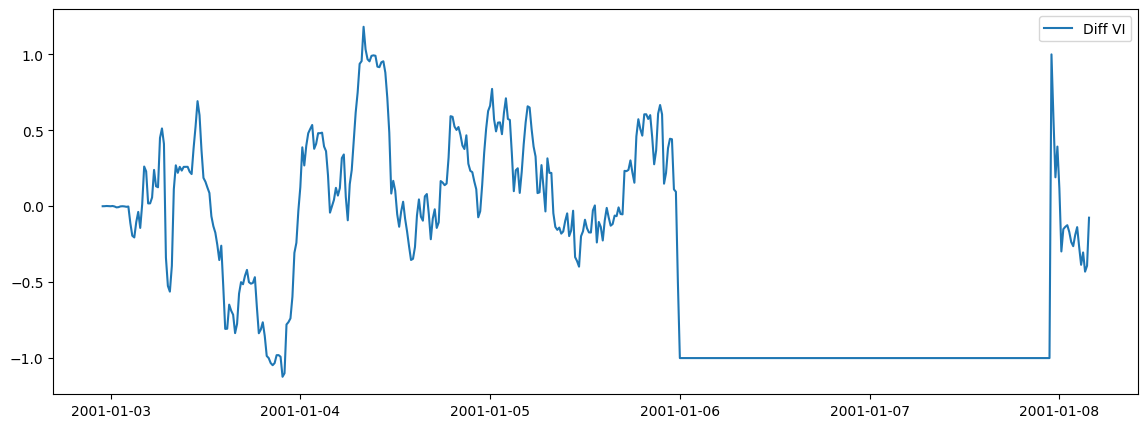

In [27]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_vortex_ind_diff'][:length], label='Diff VI')
plt.legend()
plt.show()

#### Trix (TRIX) Indicator

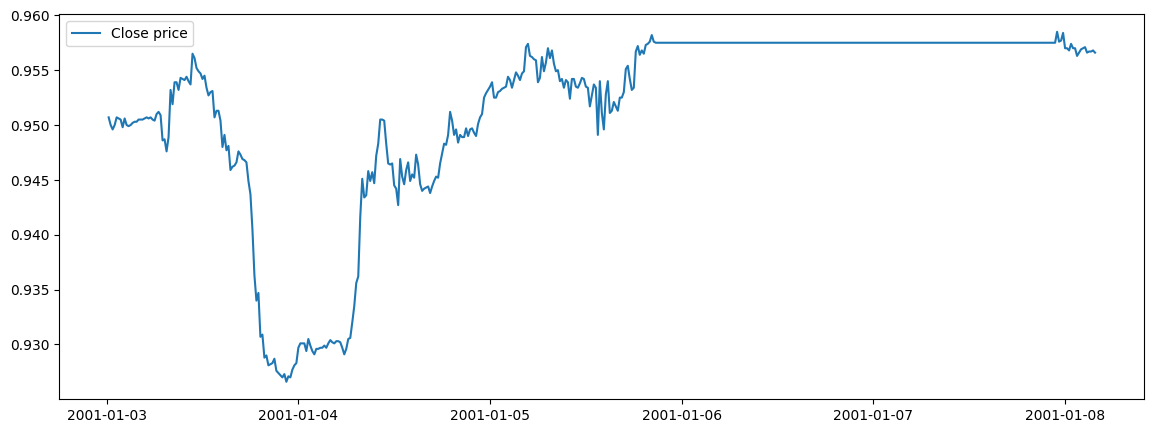

In [28]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][5:length], target_prices['<CLOSE>'][5:length], label='Close price')
plt.legend()
plt.show()

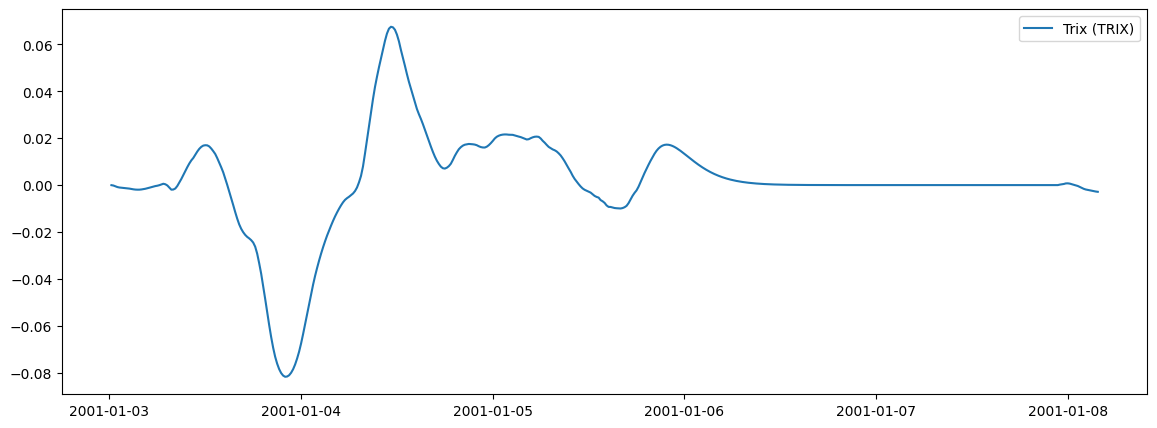

In [29]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][5:length], target_prices['trend_trix'][5:length], label='Trix (TRIX)')
plt.legend()
plt.show()

#### Mass Index (MI)

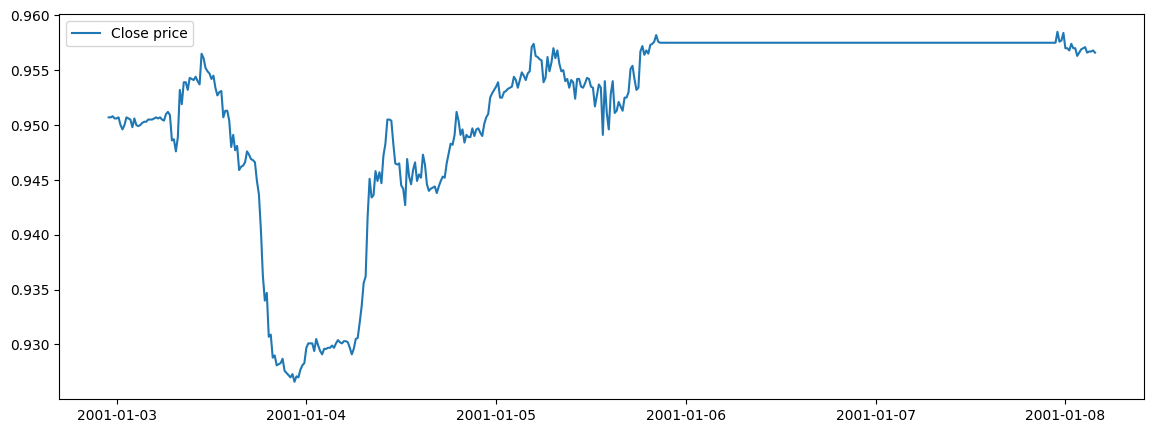

In [30]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

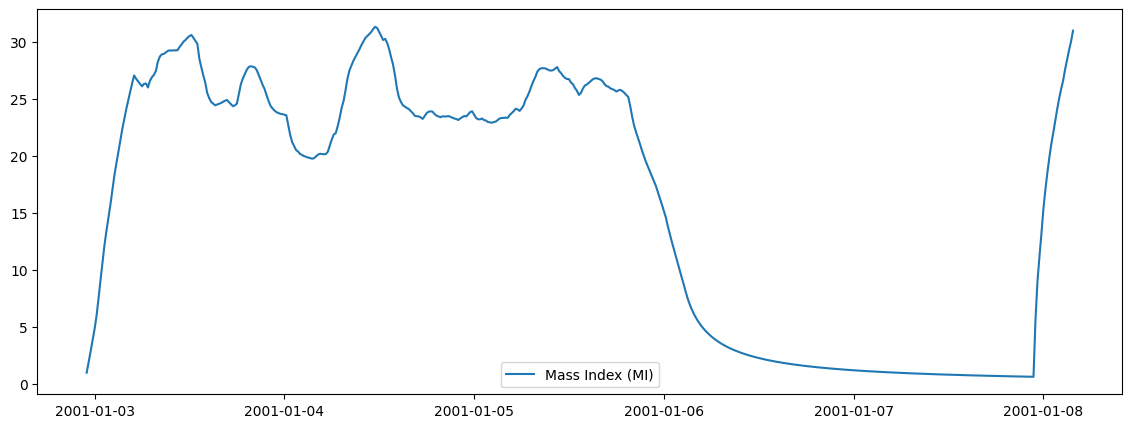

In [31]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_mass_index'][:length], label='Mass Index (MI)')
plt.legend()
plt.show()

#### Detrended Price Oscillator (DPO)

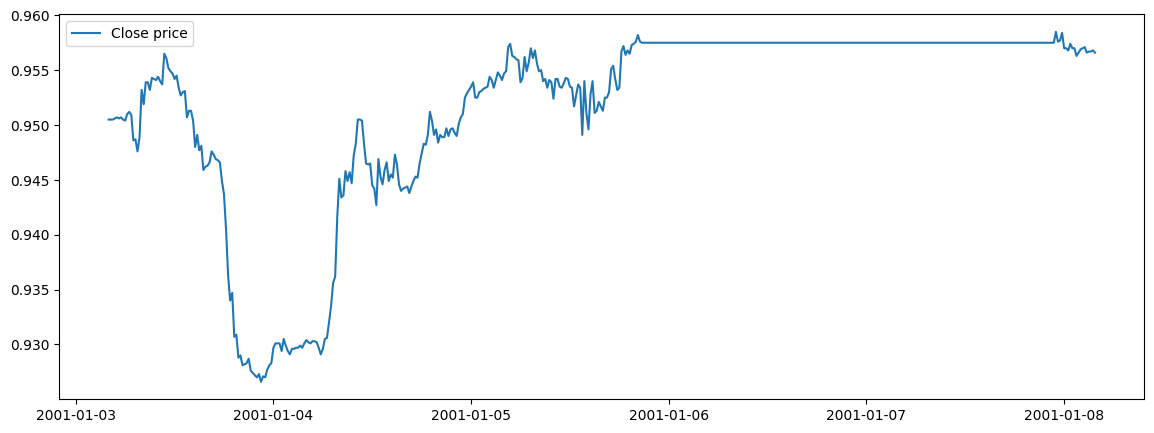

In [32]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][20:length], target_prices['<CLOSE>'][20:length], label='Close price')
plt.legend()
plt.show()

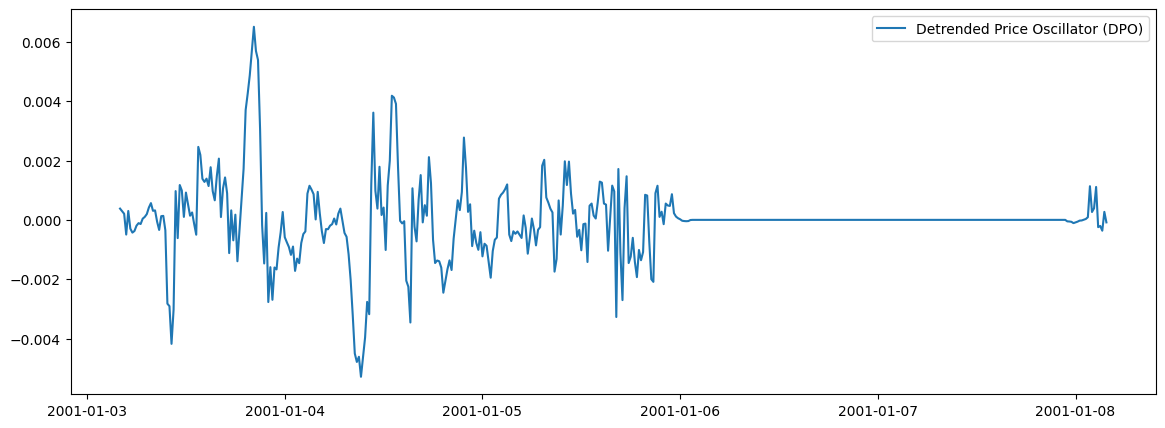

In [33]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][20:length], target_prices['trend_dpo'][20:length], label='Detrended Price Oscillator (DPO)')
plt.legend()
plt.show()

#### KST Oscillator (KST Signal)

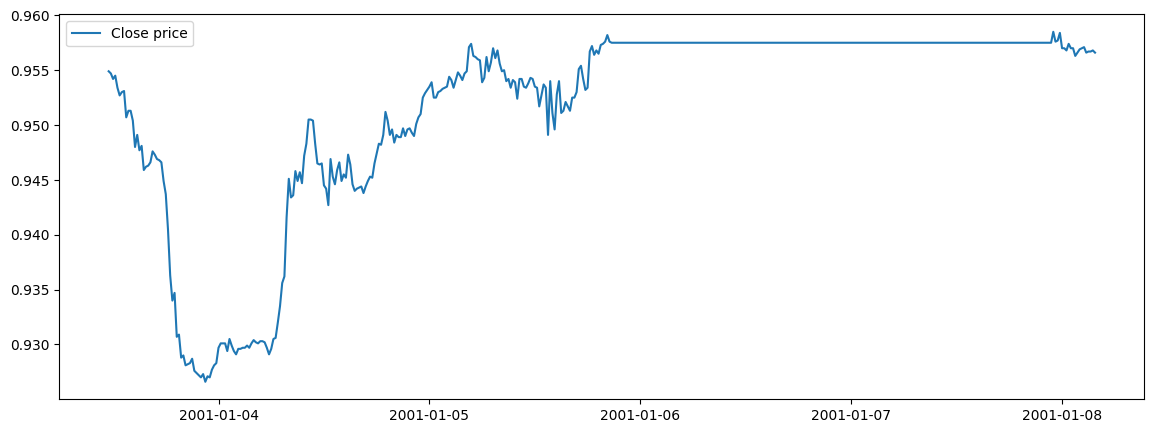

In [34]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][50:length], target_prices['<CLOSE>'][50:length], label='Close price')
plt.legend()
plt.show()

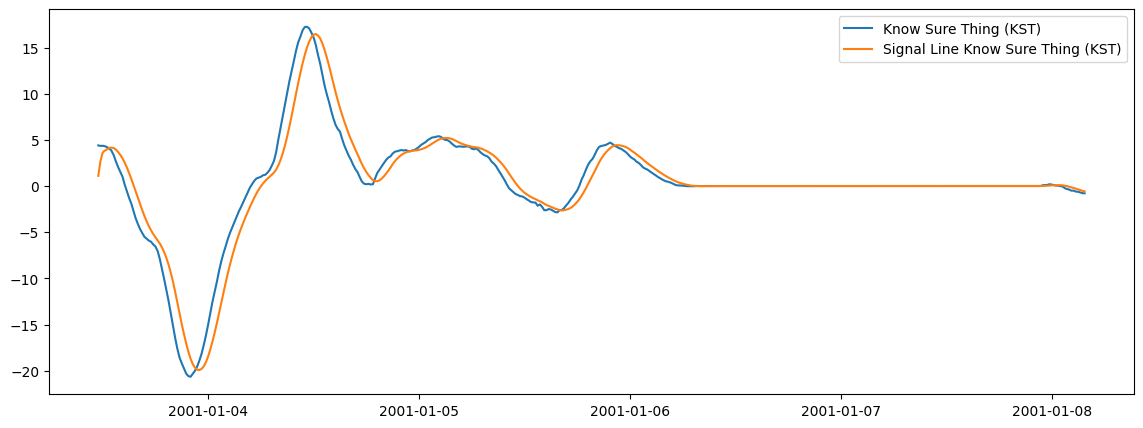

In [35]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][50:length], target_prices['trend_kst'][50:length], label='Know Sure Thing (KST)')
plt.plot(target_prices['<DT>'][50:length], target_prices['trend_kst_sig'][50:length], label='Signal Line Know Sure Thing (KST)')
plt.legend()
plt.show()

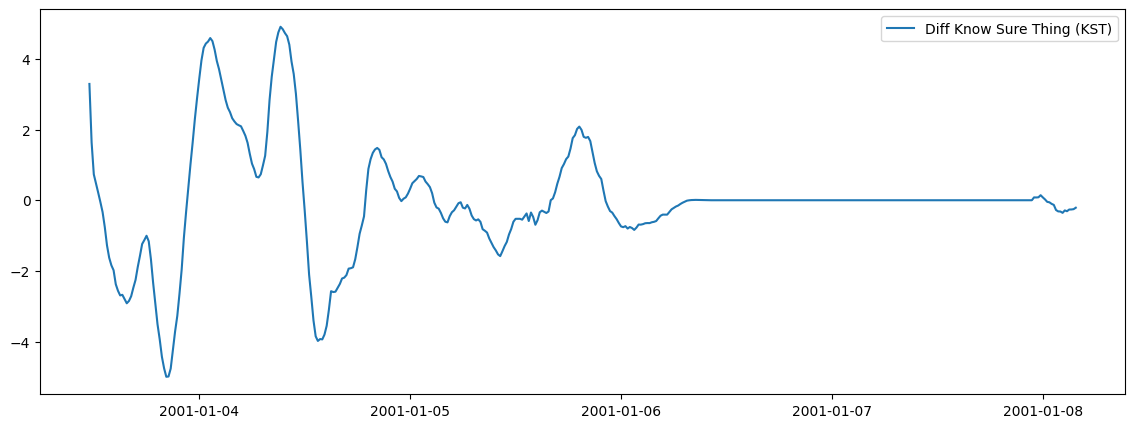

In [36]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][50:length], target_prices['trend_kst_diff'][50:length], label='Diff Know Sure Thing (KST)')
plt.legend()
plt.show()

#### Ichimoku Kinkō Hyō (Ichimoku)

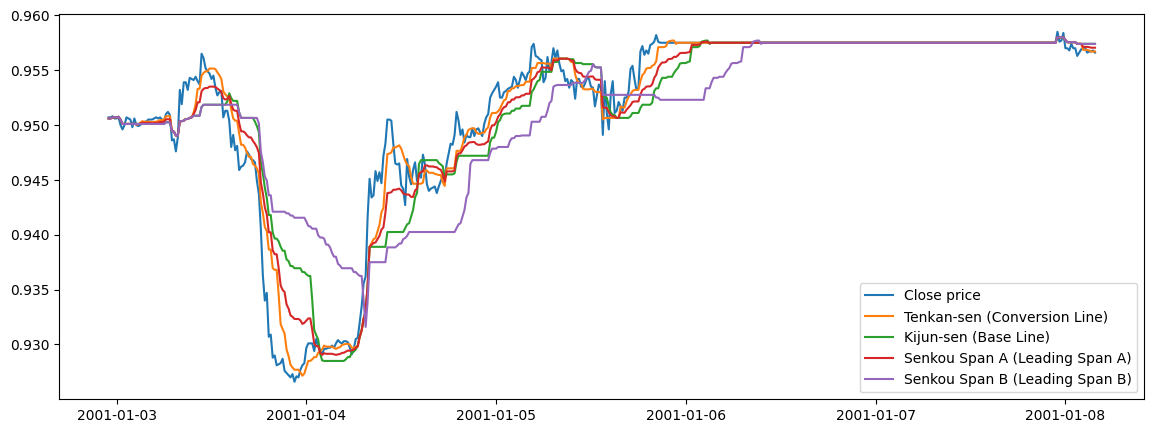

In [37]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ichimoku_conv'][:length], label='Tenkan-sen (Conversion Line)')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ichimoku_base'][:length], label='Kijun-sen (Base Line)')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ichimoku_a'][:length], label='Senkou Span A (Leading Span A)')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_ichimoku_b'][:length], label='Senkou Span B (Leading Span B)')
plt.legend()
plt.show()

#### Schaff Trend Cycle (STC)

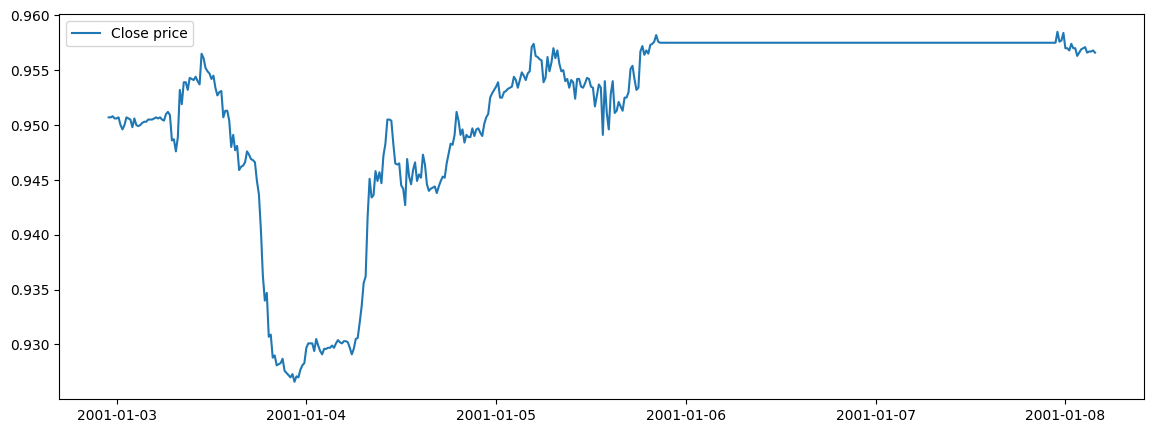

In [38]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

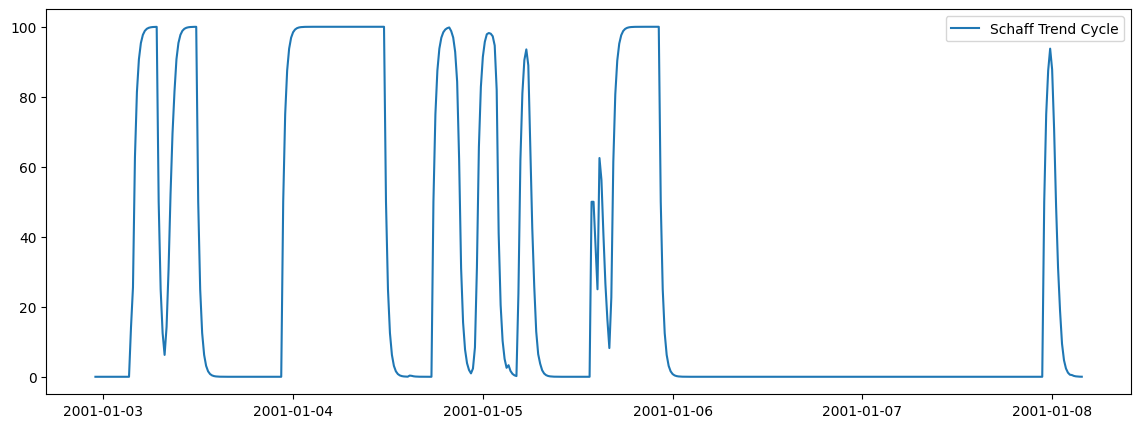

In [39]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_stc'][:length], label='Schaff Trend Cycle')
plt.legend()
plt.show()

#### Average Directional Movement Index (ADX)

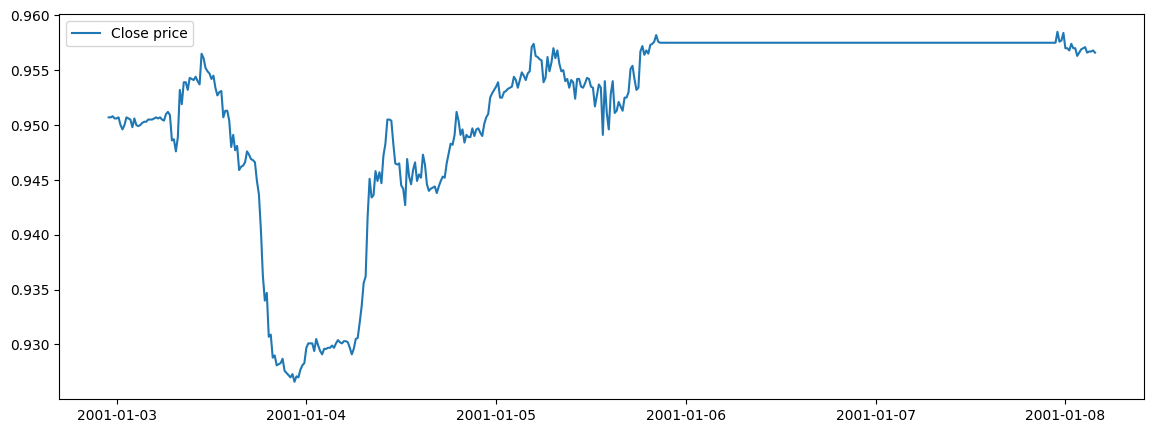

In [40]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

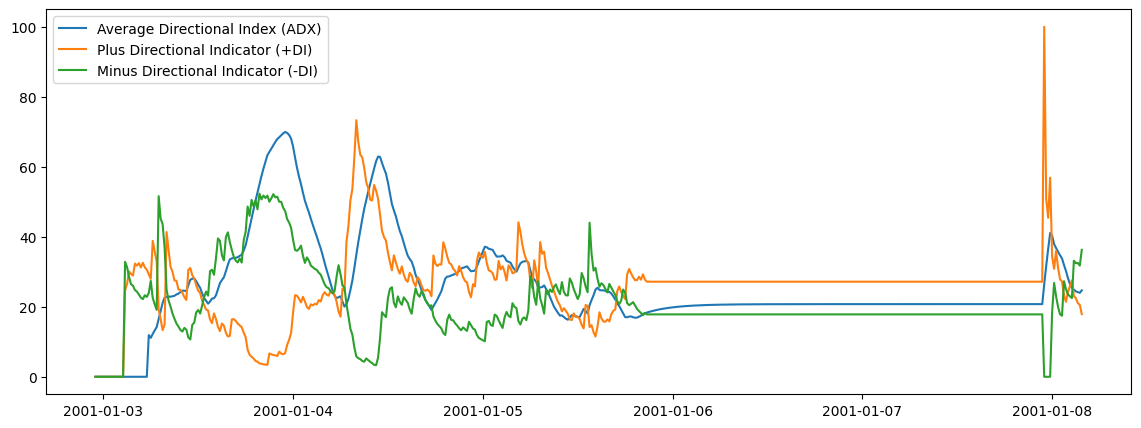

In [41]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_adx'][:length], label='Average Directional Index (ADX)')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_adx_pos'][:length], label='Plus Directional Indicator (+DI)')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_adx_neg'][:length], label='Minus Directional Indicator (-DI)')
plt.legend()
plt.show()

#### Commodity Channel Index (CCI)

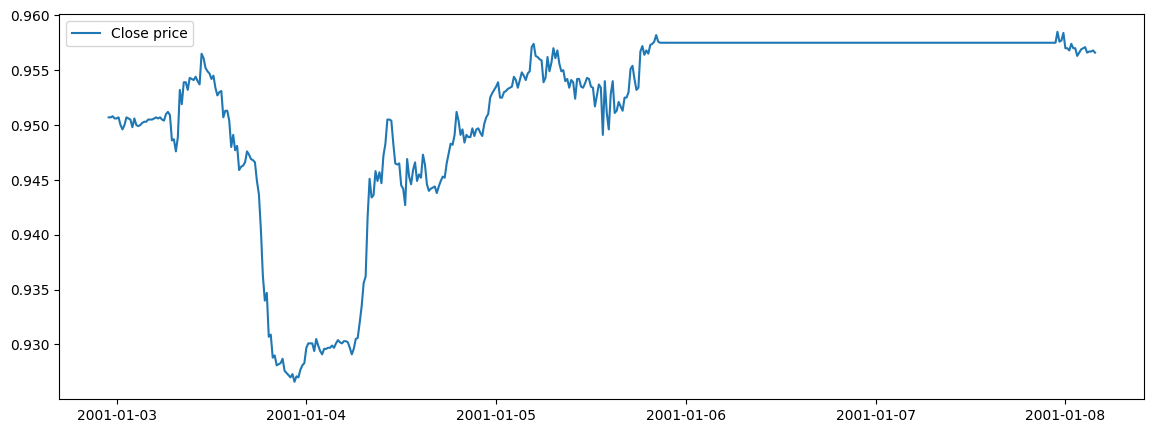

In [42]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

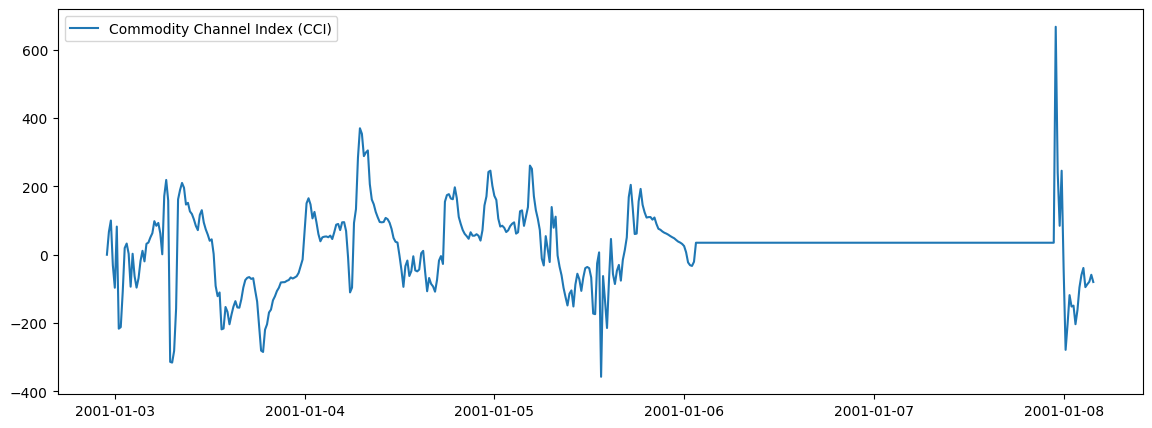

In [43]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_cci'][:length], label='Commodity Channel Index (CCI)')
plt.legend()
plt.show()

#### Aroon Indicator

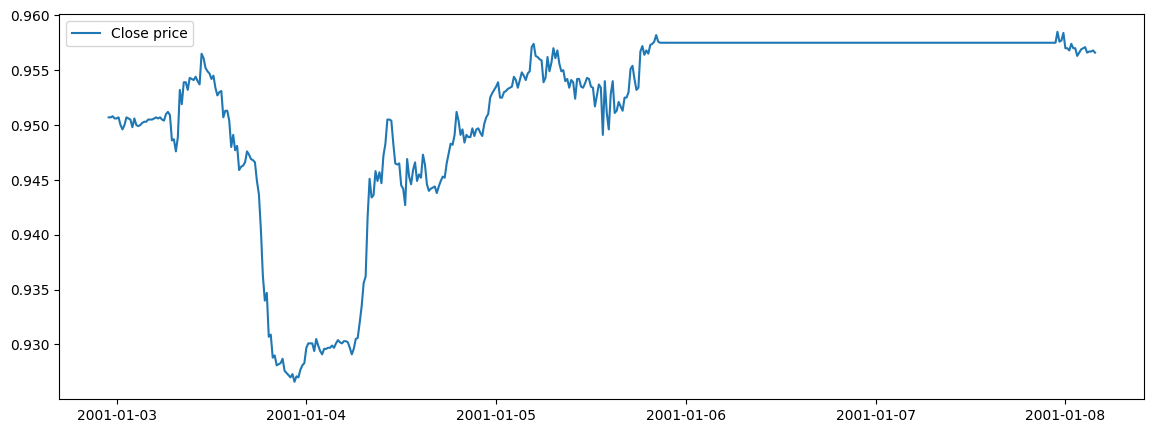

In [44]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

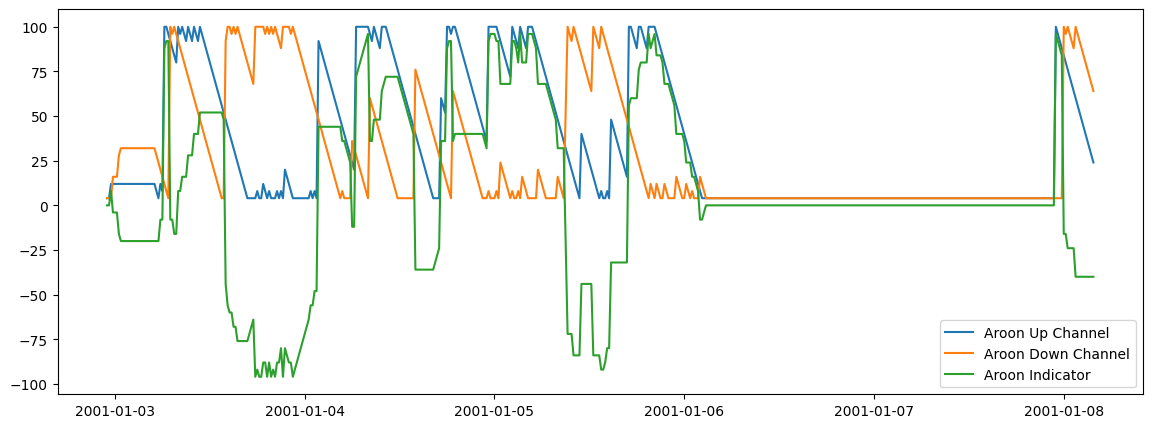

In [45]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['trend_aroon_up'][:length], label='Aroon Up Channel')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_aroon_down'][:length], label='Aroon Down Channel')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_aroon_ind'][:length], label='Aroon Indicator')
plt.legend()
plt.show()

#### PSAR Indicator

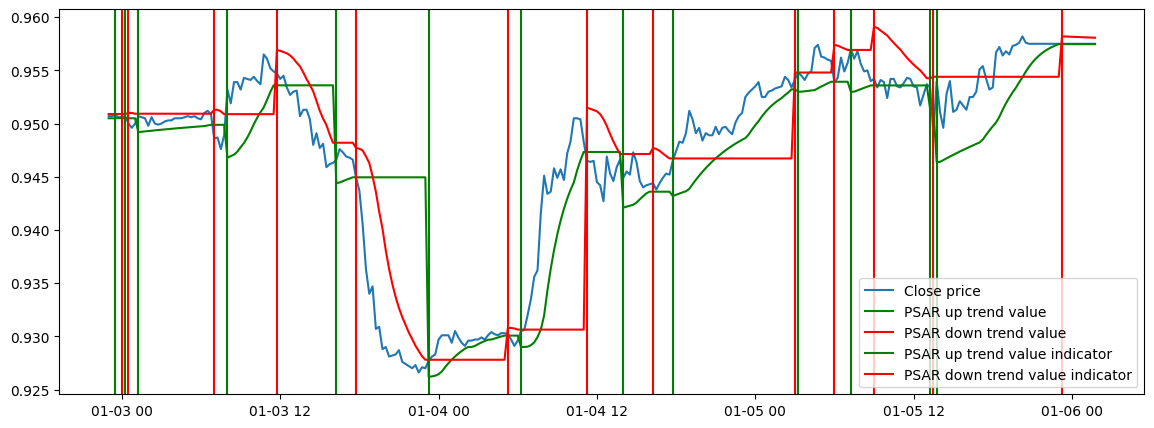

In [46]:
length = 300
plt.figure(figsize=(14,5))

plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_psar_up'][:length], label='PSAR up trend value', color='green')
plt.plot(target_prices['<DT>'][:length], target_prices['trend_psar_down'][:length], label='PSAR down trend value', color='red')

trend_psar_up_indicator = target_prices['trend_psar_up_indicator'][:length]
for i, x in enumerate(trend_psar_up_indicator[trend_psar_up_indicator == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('PSAR up trend value indicator' if i==0 else None), color='green')
    
trend_psar_down_indicator = target_prices['trend_psar_down_indicator'][:length]
for i, x in enumerate(trend_psar_down_indicator[trend_psar_down_indicator == 1].index):
    plt.axvline(target_prices['<DT>'][x], label=('PSAR down trend value indicator' if i==0 else None), color='red')    
    
plt.legend()
plt.show()

### Momentum Indicators

#### Relative Strength Index (RSI), Stochastic RSI

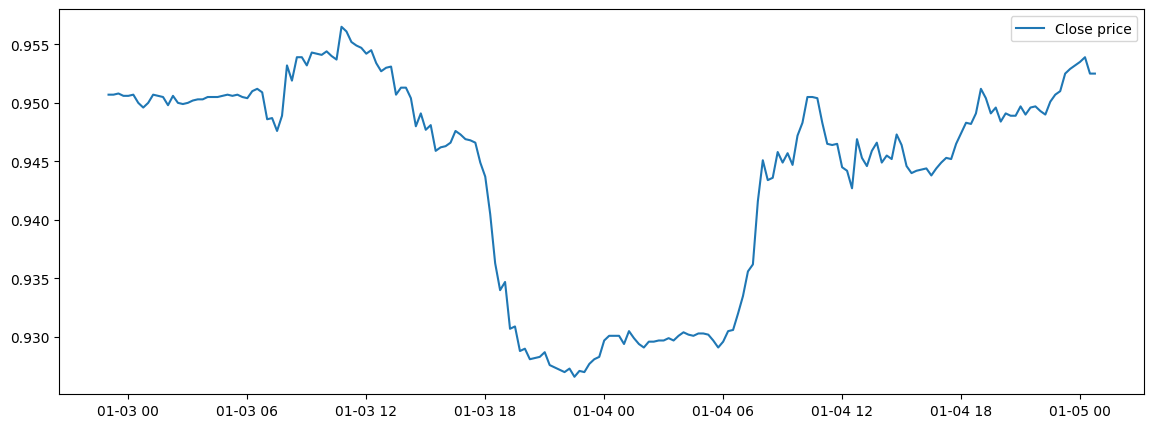

In [47]:
length = 200
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

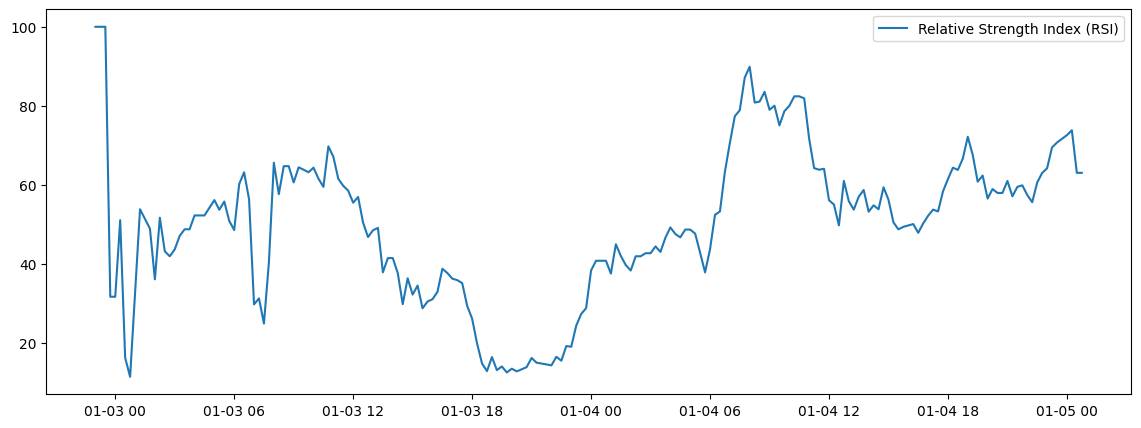

In [48]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_rsi'][:length], label='Relative Strength Index (RSI)')
plt.legend()
plt.show()

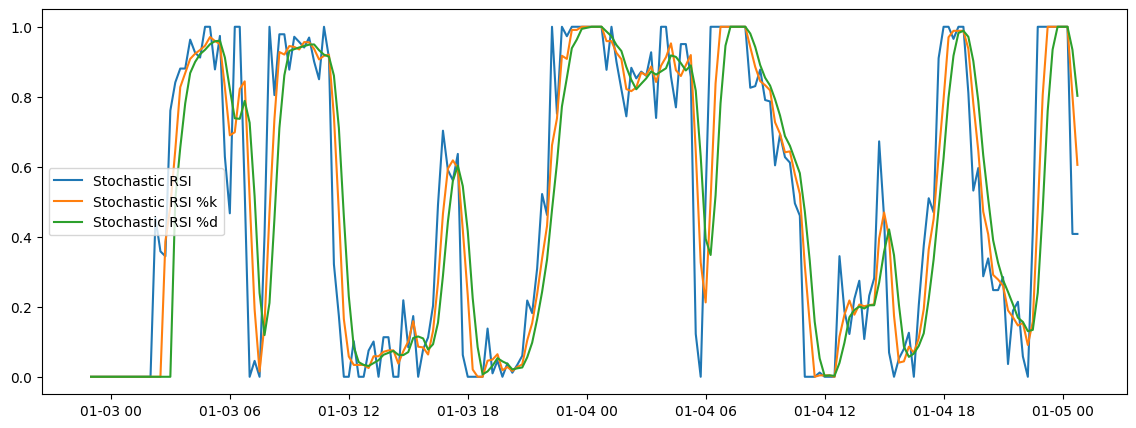

In [49]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_stoch_rsi'][:length], label='Stochastic RSI')
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_stoch_rsi_k'][:length], label='Stochastic RSI %k')
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_stoch_rsi_d'][:length], label='Stochastic RSI %d')
plt.legend()
plt.show()

#### True strength index (TSI)

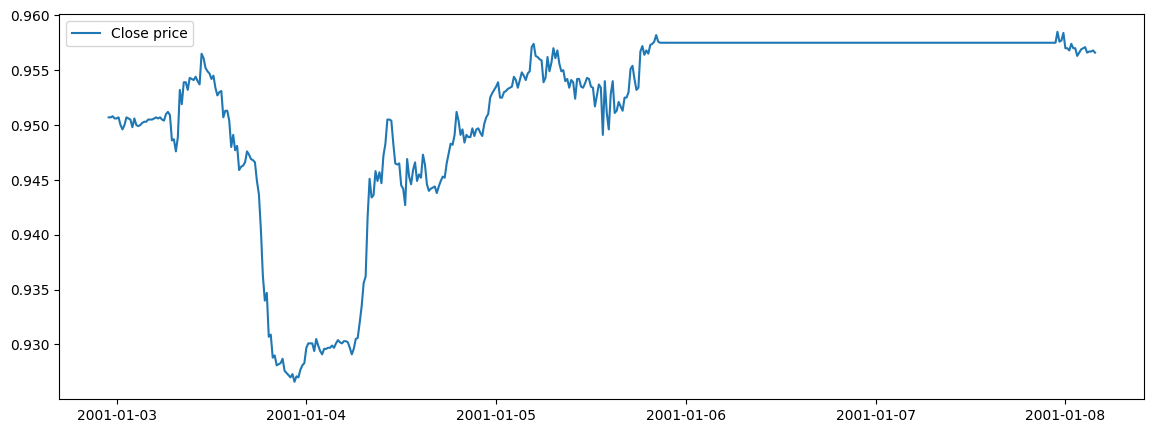

In [50]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

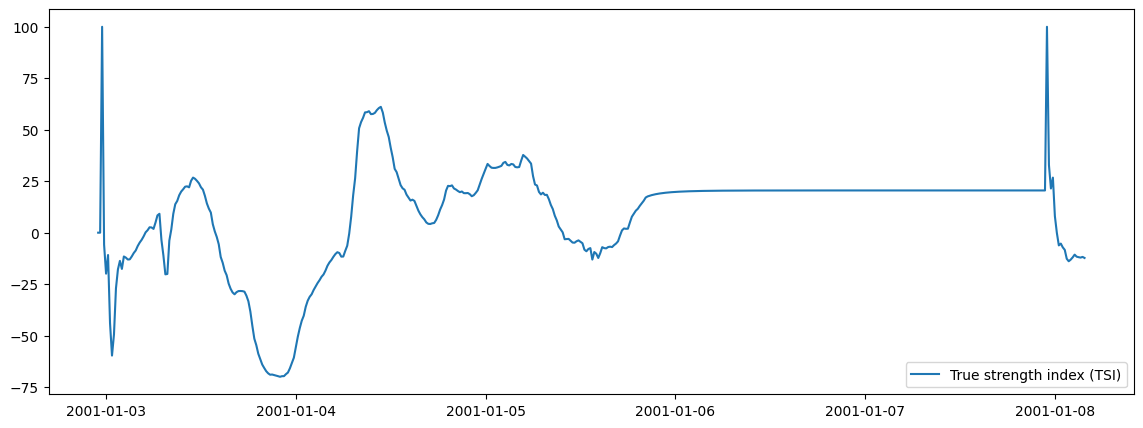

In [51]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_tsi'][:length], label='True strength index (TSI)')
plt.legend()
plt.show()

#### Ultimate Oscillator

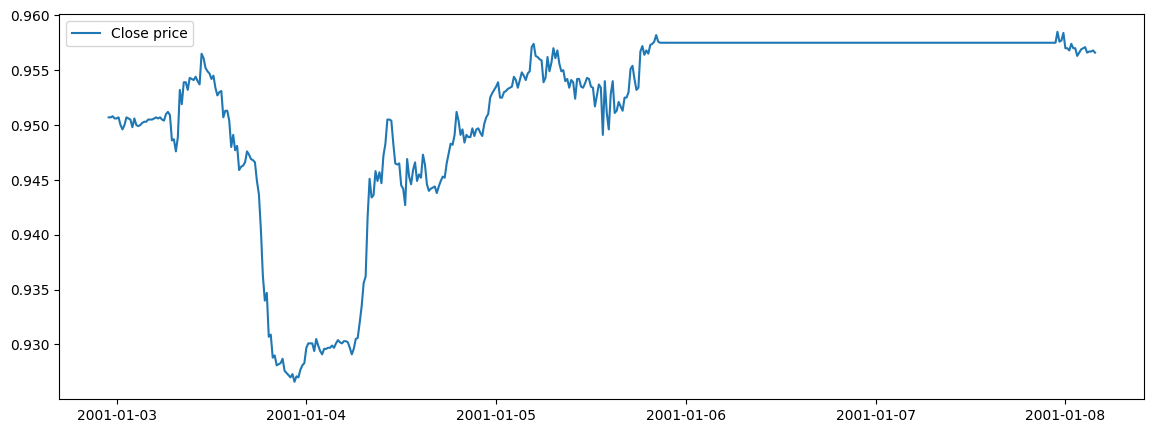

In [52]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

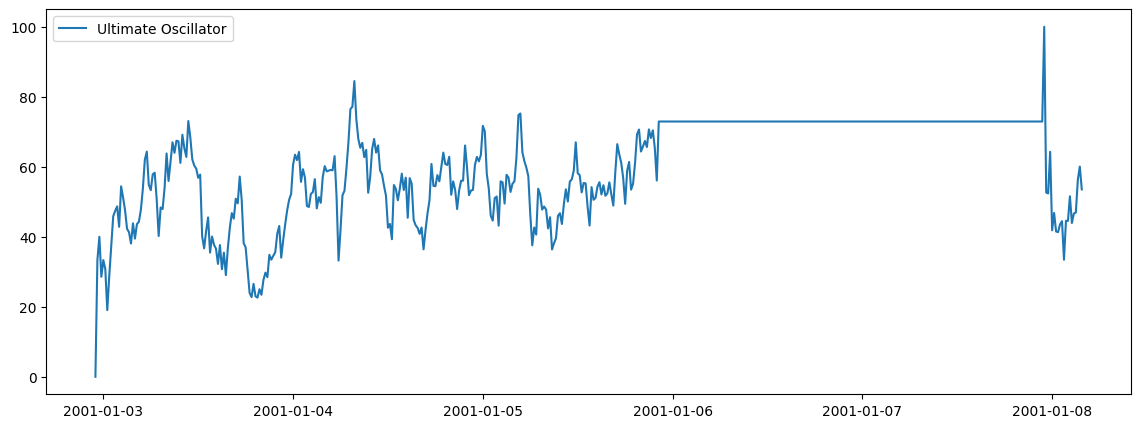

In [53]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_uo'][:length], label='Ultimate Oscillator')
plt.legend()
plt.show()

#### Stochastic Oscillator, Williams R Indicator

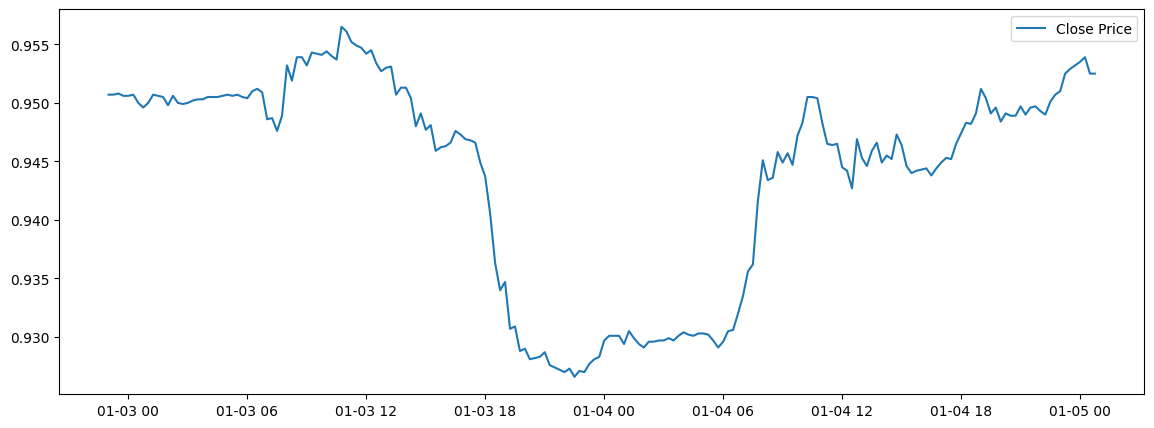

In [54]:
length = 200
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close Price')
plt.legend()
plt.show()

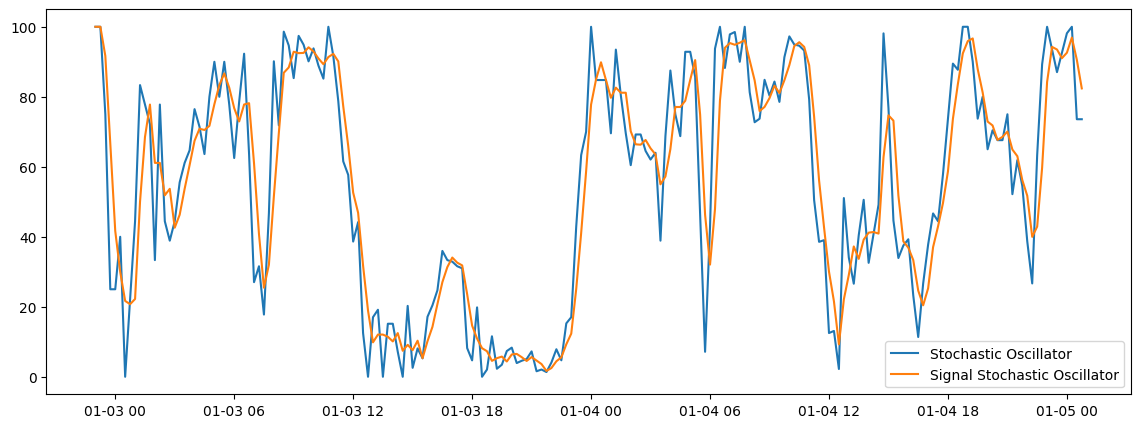

In [55]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_stoch'][:length], label='Stochastic Oscillator')
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_stoch_signal'][:length], label='Signal Stochastic Oscillator')
plt.legend()
plt.show()

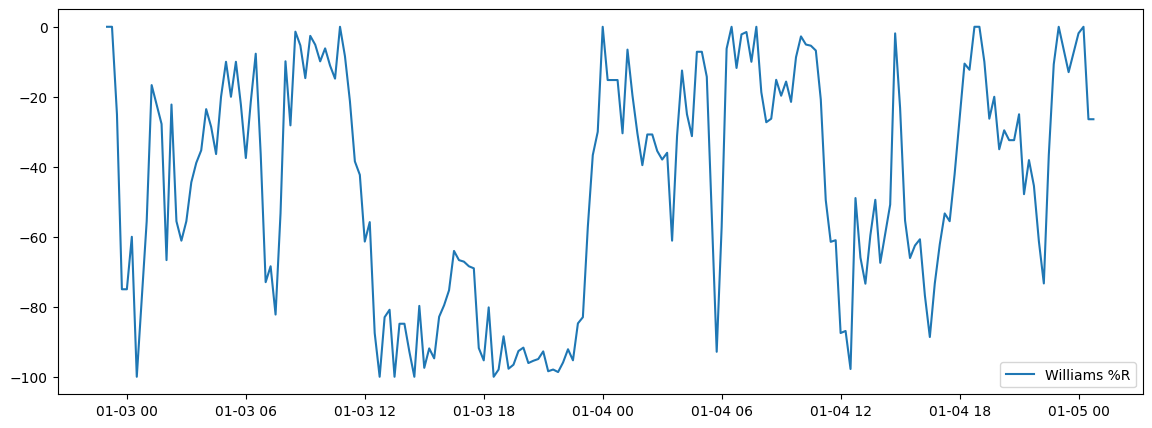

In [56]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_wr'][:length], label='Williams %R')
plt.legend()
plt.show()

#### Awesome Oscillator

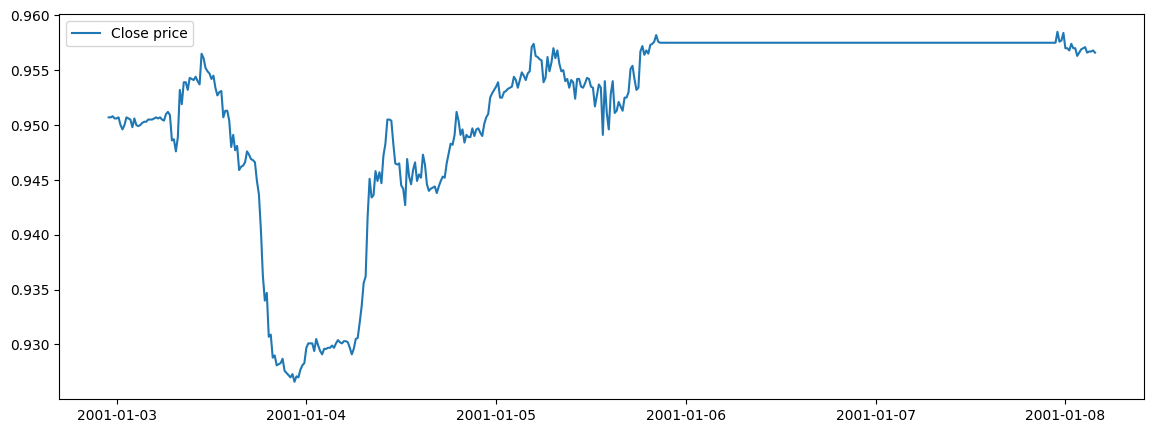

In [57]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

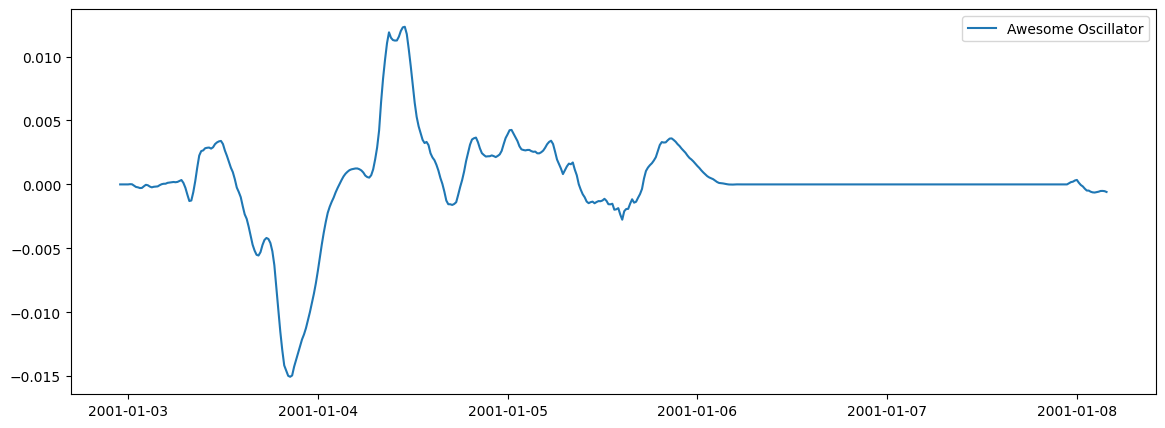

In [58]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_ao'][:length], label='Awesome Oscillator')
plt.legend()
plt.show()

#### Rate of Change (ROC)

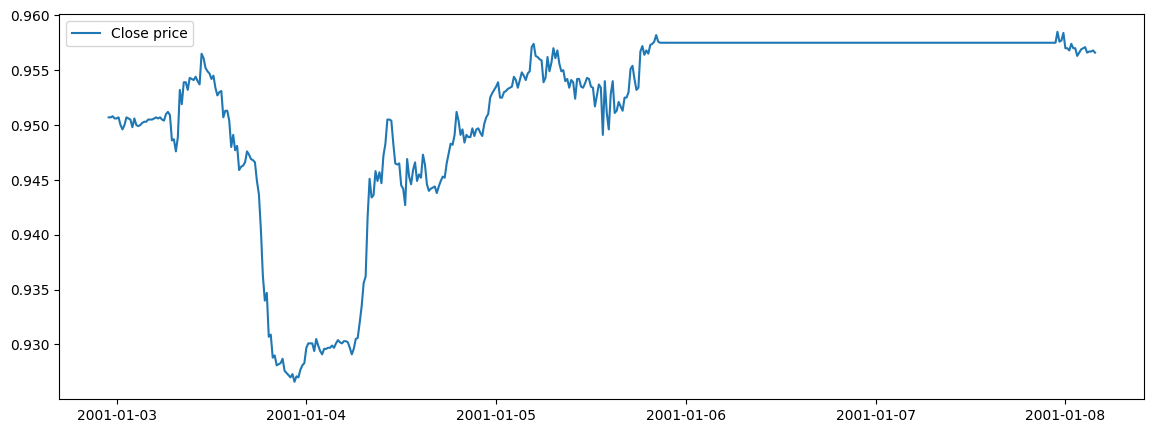

In [59]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

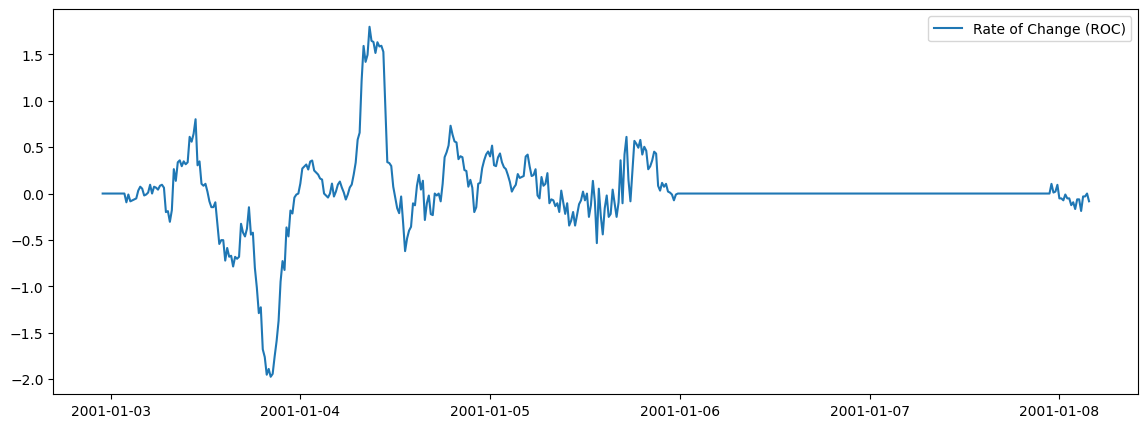

In [60]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_roc'][:length], label='Rate of Change (ROC)')
plt.legend()
plt.show()

#### Percentage Price Oscillator (PPO)

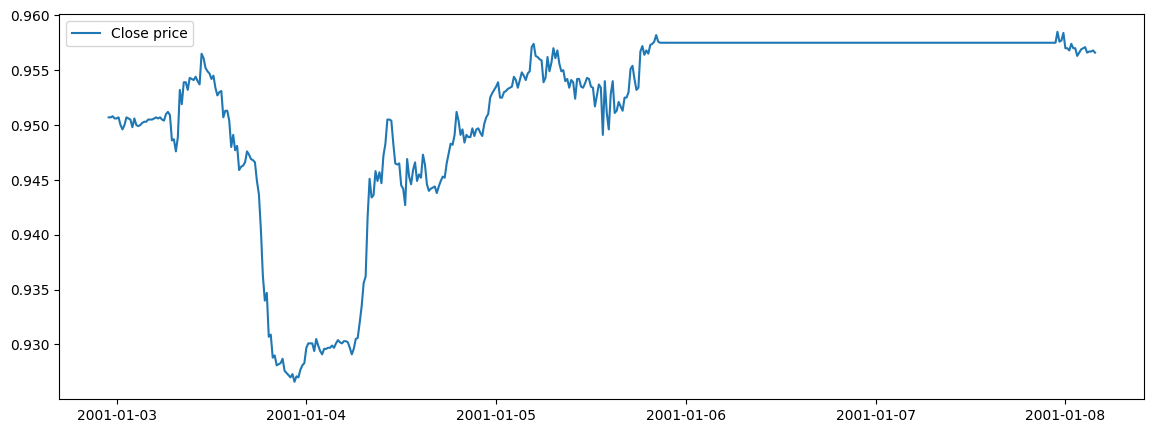

In [61]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.legend()
plt.show()

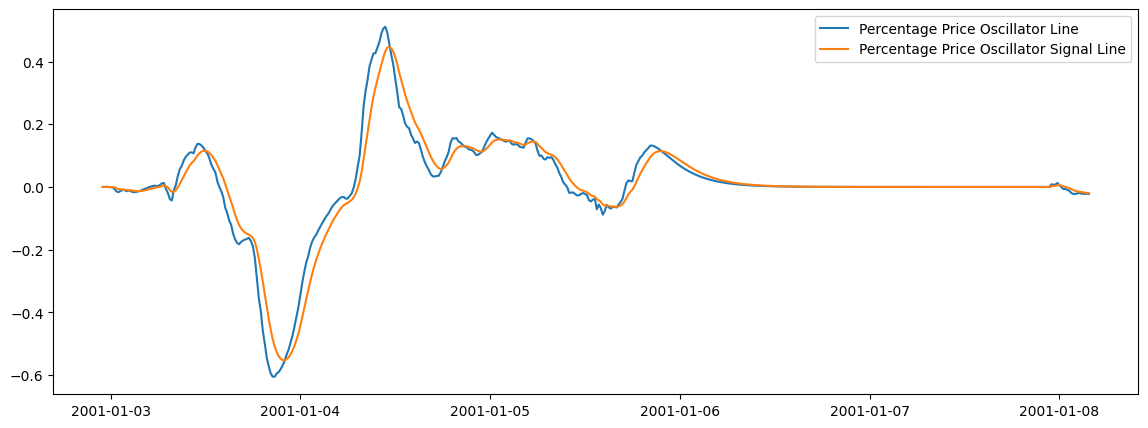

In [62]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_ppo'][:length], label='Percentage Price Oscillator Line')
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_ppo_signal'][:length], label='Percentage Price Oscillator Signal Line')
plt.legend()
plt.show()

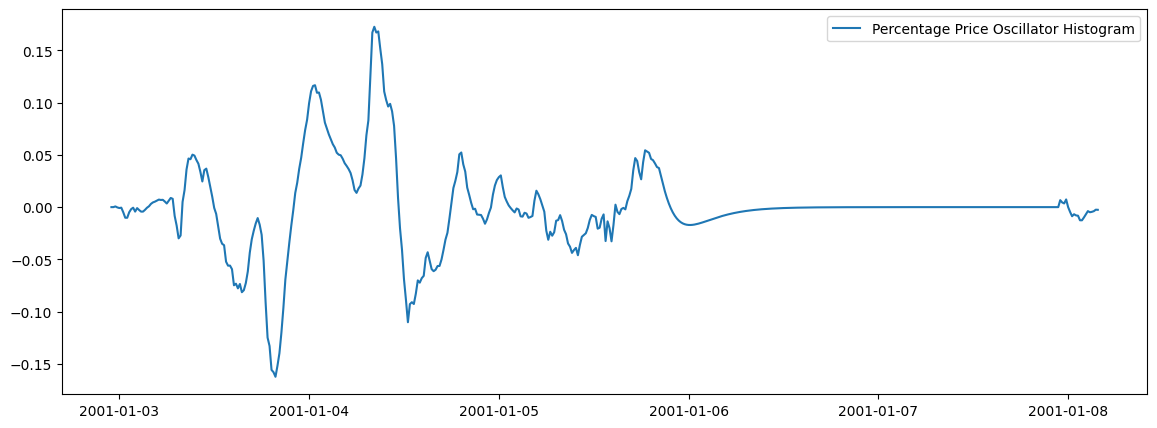

In [63]:
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_ppo_hist'][:length], label='Percentage Price Oscillator Histogram')
plt.legend()
plt.show()

#### Kaufman's Adaptive Moving Average (KAMA)

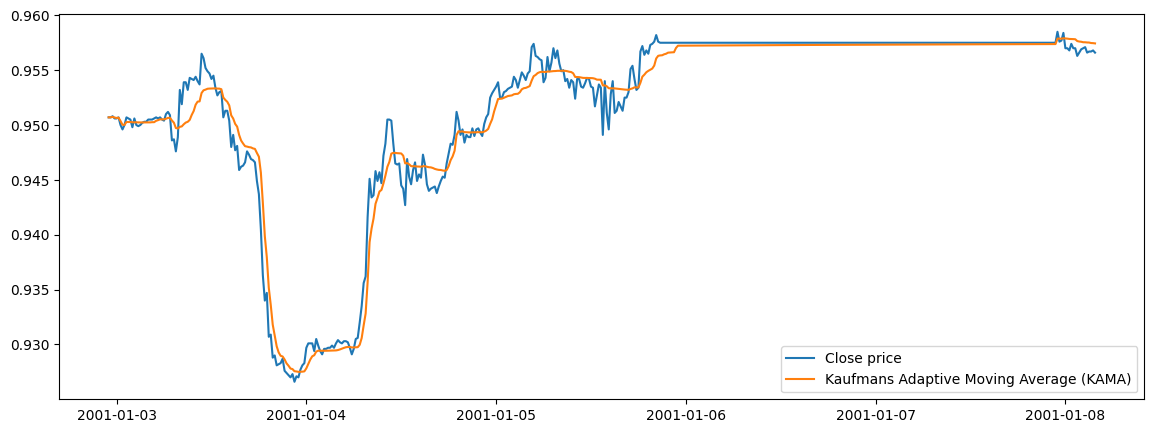

In [64]:
length = 500
plt.figure(figsize=(14,5))
plt.plot(target_prices['<DT>'][:length], target_prices['<CLOSE>'][:length], label='Close price')
plt.plot(target_prices['<DT>'][:length], target_prices['momentum_kama'][:length], label='Kaufmans Adaptive Moving Average (KAMA)')
plt.legend()
plt.show()

### Feature engineering 

In [65]:
LAGS = 8

In [66]:
forex_features_df = forex_data['EURUSD'].copy()

In [67]:
forex_features_df['<HIGH LAG 1>'] = forex_features_df['<HIGH>'].shift(1)
forex_features_df['<LOW LAG 1>'] = forex_features_df['<LOW>'].shift(1)
forex_features_df['<CLOSE LAG 1>'] = forex_features_df['<CLOSE>'].shift(1)

In [68]:
forex_features_df.drop(['<HIGH>', '<LOW>', '<CLOSE>'], axis=1, inplace=True)

In [69]:
ta_features = {}

Volatility

In [70]:
indicator_bb = BollingerBands(
    close=forex_features_df['<CLOSE LAG 1>'], window=20, window_dev=2, fillna=True
)

ta_features['<BB HIGH INDICATOR>'] = indicator_bb.bollinger_hband_indicator()
ta_features['<BB LOW INDICATOR>'] = indicator_bb.bollinger_lband_indicator()

ta_features['<BB PERC BAND>'] = indicator_bb.bollinger_pband()

for i in range(LAGS):
    ta_features[f'<BB PERC BAND LAG {i+1}>'] = ta_features['<BB PERC BAND>'].shift(i+1)
    
ta_features['<BB WIDTH BAND>'] = indicator_bb.bollinger_wband()
    
for i in range(LAGS):
    ta_features[f'<BB WIDTH BAND LAG {i+1}>'] = ta_features['<BB WIDTH BAND>'].shift(i+1)

In [71]:
indicator_atr = AverageTrueRange(
    close=forex_features_df['<CLOSE LAG 1>'], 
    high=forex_features_df['<HIGH LAG 1>'], 
    low=forex_features_df['<LOW LAG 1>'], 
    window=10, 
    fillna=True
)

ta_features['<ATR>'] = indicator_atr.average_true_range()

for i in range(LAGS):
    ta_features[f'<ATR LAG {i+1}>'] = ta_features['<ATR>'].shift(i+1)

Trend

In [72]:
indicator_macd = MACD(
    close=forex_features_df['<CLOSE LAG 1>'], window_slow=26, window_fast=12, window_sign=9, fillna=True
)

ta_features['<MACD DIFF>'] = indicator_macd.macd_diff()

for i in range(LAGS):
    ta_features[f'<MACD DIFF LAG {i+1}>'] = ta_features['<MACD DIFF>'].shift(i+1)

In [73]:
indicator_vortex = VortexIndicator(
    high=forex_features_df['<HIGH LAG 1>'], 
    low=forex_features_df['<LOW LAG 1>'], 
    close=forex_features_df['<CLOSE LAG 1>'],
    window=14, 
    fillna=True
)

ta_features['<VORTEX DIFF>'] = indicator_vortex.vortex_indicator_diff()

for i in range(LAGS):
    ta_features[f'<VORTEX DIFF LAG {i+1}>'] = ta_features['<VORTEX DIFF>'].shift(i+1)

In [74]:
indicator_adx = ADXIndicator(
    high=forex_features_df['<HIGH LAG 1>'], 
    low=forex_features_df['<LOW LAG 1>'], 
    close=forex_features_df['<CLOSE LAG 1>'], 
    window=14, 
    fillna=True
)

ta_features['<+DIR>'] = indicator_adx.adx_pos()

for i in range(LAGS):
    ta_features[f'<+DIR LAG {i+1}>'] = ta_features['<+DIR>'].shift(i+1)

ta_features['<-DIR>'] = indicator_adx.adx_neg()

for i in range(LAGS):
    ta_features[f'<-DIR LAG {i+1}>'] = ta_features['<-DIR>'].shift(i+1)

/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:730: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._trs[0] = diff_directional_movement.dropna()[
/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:748: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._dip[0] = pos.dropna()[0: self._window].sum()
/Users/astepura/miniforge3/envs/rl/lib/python3.9/site-packages/ta/trend.py:760: FutureWarning: The behavior of `series[i:j]` with 

In [75]:
indicator_aroon = AroonIndicator(close=forex_features_df['<CLOSE LAG 1>'], window=25, fillna=True)

ta_features['<AROON>'] = indicator_aroon.aroon_indicator()

for i in range(LAGS):
    ta_features[f'<AROON LAG {i+1}>'] = ta_features['<AROON>'].shift(i+1)

In [76]:
indicator_psar = PSARIndicator(
    high=forex_features_df['<HIGH LAG 1>'] ,
    low=forex_features_df['<LOW LAG 1>'] ,
    close=forex_features_df['<CLOSE LAG 1>'],
    step=0.02,
    max_step=0.20,
    fillna=True,
)

ta_features['<PSAR UP INDICATOR>'] = indicator_psar.psar_up_indicator()
ta_features['<PSAR DOWN INDICATOR>'] = indicator_psar.psar_down_indicator()

Momentum

In [77]:
indicator_rsi = RSIIndicator(
    close=forex_features_df['<CLOSE LAG 1>'], window=14, fillna=True
)

ta_features['<RSI>'] = indicator_rsi.rsi()

for i in range(LAGS):
    ta_features[f'<RSI LAG {i+1}>'] = ta_features['<RSI>'].shift(i+1)

In [78]:
indicator_srsi = StochRSIIndicator(
    close=forex_features_df['<CLOSE LAG 1>'], window=14, smooth1=3, smooth2=3, fillna=True
)

ta_features['<STOCH RSI K>'] = indicator_srsi.stochrsi_k()

for i in range(LAGS):
    ta_features[f'<STOCH RSI K LAG {i+1}>'] = ta_features['<STOCH RSI K>'].shift(i+1)

In [79]:
indicator_uo = UltimateOscillator(
    high=forex_features_df['<HIGH LAG 1>'],
    low=forex_features_df['<LOW LAG 1>'],
    close=forex_features_df['<CLOSE LAG 1>'],
    window1=7,
    window2=14,
    window3=28,
    weight1=4.0,
    weight2=2.0,
    weight3=1.0,
    fillna=True
)

ta_features['<UO>'] = indicator_uo.ultimate_oscillator()

for i in range(LAGS):
    ta_features[f'<UO LAG {i+1}>'] = ta_features['<UO>'].shift(i+1)

In [80]:
forex_features_df = pd.concat([forex_features_df, pd.DataFrame(ta_features)], axis=1)

forex_features_df.drop(['<HIGH LAG 1>', '<LOW LAG 1>', '<CLOSE LAG 1>'], axis=1, inplace=True)
forex_features_df.dropna(inplace=True)
forex_features_df.reset_index(drop=True, inplace=True)

In [81]:
forex_features_df

,<DT>,<OPEN>,<BB HIGH INDICATOR>,<BB LOW INDICATOR>,<BB PERC BAND>,<BB PERC BAND LAG 1>,<BB PERC BAND LAG 2>,<BB PERC BAND LAG 3>,<BB PERC BAND LAG 4>,<BB PERC BAND LAG 5>,...,<STOCH RSI K LAG 8>,<UO>,<UO LAG 1>,<UO LAG 2>,<UO LAG 3>,<UO LAG 4>,<UO LAG 5>,<UO LAG 6>,<UO LAG 7>,<UO LAG 8>
0,2001-01-03 01:00:00,0.9496,0.0,1.0,-0.039328,-0.091792,0.560583,0.232767,0.146499,0.853553,...,0.000000,28.753244,19.046267,30.768525,33.335541,28.570212,39.997616,33.326709,0.000000,50.000000
1,2001-01-03 01:15:00,0.9500,0.0,0.0,0.245593,-0.039328,-0.091792,0.560583,0.232767,0.146499,...,0.000000,37.346276,28.753244,19.046267,30.768525,33.335541,28.570212,39.997616,33.326709,0.000000
2,2001-01-03 01:30:00,0.9507,0.0,0.0,0.665412,0.245593,-0.039328,-0.091792,0.560583,0.232767,...,0.000000,45.853373,37.346276,28.753244,19.046267,30.768525,33.335541,28.570212,39.997616,33.326709
3,2001-01-03 01:45:00,0.9506,0.0,0.0,0.596355,0.665412,0.245593,-0.039328,-0.091792,0.560583,...,0.000000,47.403826,45.853373,37.346276,28.753244,19.046267,30.768525,33.335541,28.570212,39.997616
4,2001-01-03 02:00:00,0.9504,0.0,0.0,0.528814,0.596355,0.665412,0.245593,-0.039328,-0.091792,...,0.000000,48.687642,47.403826,45.853373,37.346276,28.753244,19.046267,30.768525,33.335541,28.570212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762307,2022-09-30 17:45:00,0.9801,0.0,0.0,0.733767,0.549571,0.617164,0.869897,0.822798,0.776436,...,0.673186,54.026596,51.578261,55.735460,61.893209,62.740925,67.865551,67.333934,66.338221,56.665744
762308,2022-09-30 18:00:00,0.9798,0.0,0.0,0.625541,0.733767,0.549571,0.617164,0.869897,0.822798,...,0.678206,49.932724,54.026596,51.578261,55.735460,61.893209,62.740925,67.865551,67.333934,66.338221
762309,2022-09-30 18:15:00,0.9807,0.0,0.0,0.850067,0.625541,0.733767,0.549571,0.617164,0.869897,...,0.766450,55.856996,49.932724,54.026596,51.578261,55.735460,61.893209,62.740925,67.865551,67.333934
762310,2022-09-30 18:30:00,0.9805,0.0,0.0,0.783564,0.850067,0.625541,0.733767,0.549571,0.617164,...,0.810133,53.439890,55.856996,49.932724,54.026596,51.578261,55.735460,61.893209,62.740925,67.865551
